In [690]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from scipy import stats
from sklearn.feature_selection import RFE

In [691]:
#from google.colab import files
#uploaded = files.upload()

In [692]:
#import io
df = pd.read_excel('default of credit card clients.xls',header=1)

In [693]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Litreture Survey

##### There are 25 columns in the Dataset

#### ID: ID of each client

#### LIMIT_BAL: Amount of given credit in New Taiwan dollars (includes individual and family/supplementary credit)

#### SEX: Gender where 1 represents Male and 2 Represents Female

In [694]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

#### EDUCATION: (1 is graduate school, 2 is university, 3 is high school, 4 is others and 0,5 ,6 are unknowns)

In [695]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

#### MARRIAGE: Marital status where 1 is married, 2 is single and 3 is others and 0 is unknown

In [696]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

#### AGE: Age in years

In [697]:
df['AGE'].min()

21

In [698]:
df['AGE'].max()

79

#### PAY_0: Repayment status in September, 2005 
#### PAY_2: Repayment status in August, 2005 
#### PAY_3: Repayment status in July, 2005 
#### PAY_4: Repayment status in June, 2005 
#### PAY_5: Repayment status in May, 2005 
#### PAY_6: Repayment status in April, 2005


##### For all the above -1 represents fully paid,1 represents payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

In [699]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [700]:
df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

#### BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
#### BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
#### BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
#### BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
#### BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
#### BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

  BILL_AMT represents Amount of Bill statement in corresponding months

#### PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
#### PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
#### PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
#### PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
#### PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
#### PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

PAY_AMT represents Amount of previous payment for the corresponding month

In [701]:
df["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

### Removing Unncessary Columns

In [702]:
df1 = df.drop('ID',axis=1)

# Dataset and Domain

### Data Dictionary 

In [703]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

# Data Cleaning

In [704]:
df1 = df1.rename(columns={'default payment next month':'default'})

In [705]:
df1['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As seen previously, some categories are mislabeled or undocumented. Before proceeding, it is time to fix it.

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

Thus is a good occasion to learn how to use the .loc function

In [706]:
fil = (df1.EDUCATION == 5) | (df1.EDUCATION == 6) | (df1.EDUCATION == 0)
df1.loc[fil, 'EDUCATION'] = 4
df1.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

"Other" in education can be an education lower than the high school level.

In [707]:
df1['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [708]:
df1.loc[df1.MARRIAGE == 0, 'MARRIAGE'] = 3
df1.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

"Other" in marriage could be, for example, "divorced".

In [709]:
df1 = df1.rename(columns={'PAY_0':'PAY_1'})
df1['PAY_1']

0        2
1       -1
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    1
29999    0
Name: PAY_1, Length: 30000, dtype: int64

In [710]:
df1['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [711]:
fil = (df1.PAY_1 == -2) | (df1.PAY_1 == -1) | (df1.PAY_1 == 0)
df1.loc[fil, 'PAY_1'] = 0 
fil = (df1.PAY_2 == -2) | (df1.PAY_2 == -1) | (df1.PAY_2 == 0)
df1.loc[fil, 'PAY_2'] = 0
fil = (df1.PAY_3 == -2) | (df1.PAY_3 == -1) | (df1.PAY_3 == 0)
df1.loc[fil, 'PAY_3'] = 0
fil = (df1.PAY_4 == -2) | (df1.PAY_4 == -1) | (df1.PAY_4 == 0)
df1.loc[fil, 'PAY_4'] = 0
fil = (df1.PAY_5 == -2) | (df1.PAY_5 == -1) | (df1.PAY_5 == 0)
df1.loc[fil, 'PAY_5'] = 0
fil = (df1.PAY_6 == -2) | (df1.PAY_6 == -1) | (df1.PAY_6 == 0)
df1.loc[fil, 'PAY_6'] = 0

In [712]:
fil = (df1.PAY_1 == 0) & (df1.PAY_2 == 0) & (df1.PAY_3 == 0) & (df1.PAY_4 == 0) & (df1.PAY_5 == 0) & (df1.PAY_6 == 0) & (df1.default ==1)
df1.loc[fil,'default'] = 0

- As customers who have not defaulted in any month cannot be potential defaulters hence, we have transformed the data as above.

In [713]:
fil = (df1.PAY_1 > 0) & (df1.PAY_2 > 0) & (df1.PAY_3 > 0) & (df1.PAY_4 > 0) & (df1.PAY_5 > 0) & (df1.PAY_6 > 0) & (df1.default ==0)
df1.loc[fil,'default'] = 1

- As customers who have defaulted in every month are the potential defaulters hence, we have transformed the data as above.

In [714]:
fil = (df1.BILL_AMT1 < 0) 
df1.loc[fil,'BILL_AMT1'] = 0

fil = (df1.BILL_AMT2 < 0) 
df1.loc[fil,'BILL_AMT2'] = 0

fil = (df1.BILL_AMT3 < 0) 
df1.loc[fil,'BILL_AMT3'] = 0

fil = (df1.BILL_AMT4 < 0) 
df1.loc[fil,'BILL_AMT4'] = 0

fil = (df1.BILL_AMT5 < 0) 
df1.loc[fil,'BILL_AMT5'] = 0

fil = (df1.BILL_AMT6 < 0) 
df1.loc[fil,'BILL_AMT6'] = 0

- As negative Bill Amount paid indicates that the person has paid his due payment already. Hence, we transform the data as above.

In [715]:
df1[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


According to our documentation, the PAY_n variables indicate the number of months of delay and indicates "pay duly"with -1. Then what is -2? And what is 0? It seems to me the label has to be adjusted to 0 for pay duly.

In [716]:
df1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [717]:
numerical=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
categorical=['EDUCATION','MARRIAGE','SEX','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [718]:
len(numerical)

14

In [719]:
len(categorical)

9

In [720]:
df1.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

#### There are no null values in the given dataset

In [721]:
pd.crosstab(df1['SEX'],df1['default'])

default,0,1
SEX,,
1,9836,2052
2,15464,2648


In [722]:
gender = df1.groupby(['SEX', 'default']).size().unstack(1)
gender

default,0,1
SEX,,
1,9836,2052
2,15464,2648


In [723]:
gender['perc'] = (gender[1]/(gender[0] + gender[1])) 
gender

default,0,1,perc
SEX,,,
1,9836,2052,0.172611
2,15464,2648,0.146201


In [724]:
df1[["SEX", "default"]].groupby(['SEX']).mean().sort_values(by='default')

,default
SEX,
2,0.146201
1,0.172611


Considering that about 22% of the customers will default, we see a couple of things:

There are significantly more women than men i.e. 14349

Men are most likely going to default the next month i.e. 24.17%

In [725]:
pd.crosstab(df1['LIMIT_BAL'],df1['default'])

default,0,1
LIMIT_BAL,,
10000,347,146
16000,2,0
20000,1385,591
30000,1101,509
40000,148,82
...,...,...
750000,4,0
760000,1,0
780000,2,0


In [726]:
pd.crosstab(df1['EDUCATION'],df1['default'])

default,0,1
EDUCATION,,
1,9225,1360
2,11627,2403
3,3990,927
4,458,10


It seems that the higher is the education, the lower is the probability of defaulting the next month. Only exception is for the category labeled "Other" that, if we stick to the documentation, would be lower than high school. However, numerically they will not have much weight in the final result.

In [727]:
pd.crosstab(df1['MARRIAGE'],df1['default'])

default,0,1
MARRIAGE,,
1,11425,2234
2,13560,2404
3,315,62


In [728]:
marriage = df1.groupby(['MARRIAGE', 'default']).size().unstack(1)
marriage

default,0,1
MARRIAGE,,
1,11425,2234
2,13560,2404
3,315,62


In [729]:
marriage['perc'] = (marriage[1]/(marriage[0] + marriage[1])) 
marriage

default,0,1,perc
MARRIAGE,,,
1,11425,2234,0.163555
2,13560,2404,0.150589
3,315,62,0.164456


Here it seems that married people are most likely to default as well as the misterious category "Other" ( which is again numerically less relevant than the others)

### Observations

Defaults have a higher proportion of Lower LIMIT_BAL values

NonDefaults have a higher proportion of Females (Sex=2)

NonDefaults have a higher proportion of MoreEducated (EDUCATION=1 or 2)

NonDefaults have a higher proportion of Singles (MARRIAGE=2)

NonDefaults have a higher proportion of people 30-40years


# EDA

### Univariate Analysis

##### Education

No handles with labels found to put in legend.


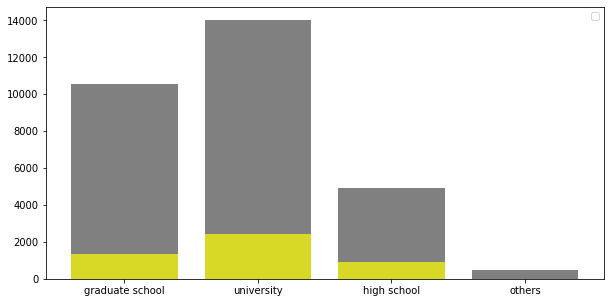

Percentage of Graduate school Default is 12.848370335380254 %
Percentage of University Default is 17.127583749109053 %
Percentage of High school Default is 18.8529591214155 %
Percentage of Others Default is 2.1367521367521367 %


In [730]:
#(1 = graduate school; 2 = university; 3 = high school; 4 = others)
# preparing the vairable for the diagram


data = df1.drop('default',axis=1)
outcome = df1['default']


_EDUCATION_RANGE= [1,2,3,4]
plt.figure(figsize=(10,5))

def calculate_percentage (default_count, total_count,label):
    print ("Percentage of {} is {} %".format(label,((total_count * 100) / default_count)))

school= df1['EDUCATION'][data['EDUCATION']==1].count()
school_default = df1['EDUCATION'][(df1['EDUCATION']==1)&(df1['default'])].count()

university= df['EDUCATION'][data['EDUCATION']==2].count()
university_default = df1['EDUCATION'][(df1['EDUCATION']==2)&(df1['default'])].count()

high_school= df1['EDUCATION'][data['EDUCATION']==3].count()
high_school_default = df1['EDUCATION'][(df1['EDUCATION']==3)&(df1['default'])].count()

others= df1['EDUCATION'][data['EDUCATION']==4].count()
others_default = df1['EDUCATION'][(df1['EDUCATION']==4)&(df1['default'])].count()

education_total = [school,university,high_school,others]
default_education_total=  [school_default,university_default,high_school_default,others_default] 


plt.bar(_EDUCATION_RANGE , education_total,color='grey')
plt.bar(_EDUCATION_RANGE , default_education_total,color='yellow', alpha = 0.7)
plt.xticks(_EDUCATION_RANGE,['graduate school','university','high school','others'])

plt.legend()
plt.show()

calculate_percentage(school,school_default,"Graduate school Default")
calculate_percentage(university,university_default,"University Default")
calculate_percentage(high_school,high_school_default,"High school Default")
calculate_percentage(others,others_default,"Others Default")

##### SEX

No handles with labels found to put in legend.


Gender / Default


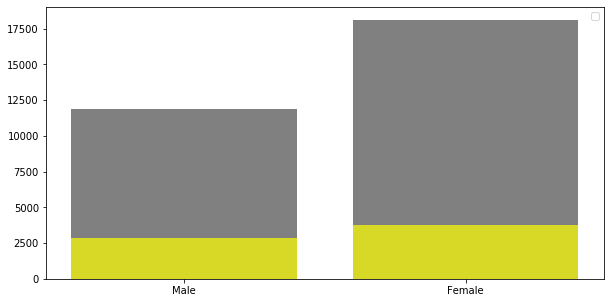

Percentage of Male Default is 24.167227456258413 %
Percentage of Female Default is 20.776280918727917 %


In [731]:

df['SEX'] =  [ 0 if x==1 else 1 for x in data['SEX']]
data['SEX']= df['SEX']
print("Gender / Default")
plt.figure(figsize=(10,5))
_GENDER_RANGE= [0,1]

male= df['SEX'][data['SEX']==0].count()
male_default = df['SEX'][(df['SEX']==0)&(df['default payment next month']==1)].count()

female=df['SEX'][data['SEX']==1].count()
female_default = df['SEX'][(df['SEX']==1)&(df['default payment next month']==1)].count()

gender_total = [male,female]
default_gender_total = [male_default,female_default]

plt.bar(_GENDER_RANGE,gender_total, color='grey')
plt.bar(_GENDER_RANGE,default_gender_total, color='yellow',alpha = 0.7)
plt.xticks([0,1],['Male','Female'])

plt.legend()
plt.show()
calculate_percentage(male,male_default,"Male Default")
calculate_percentage(female,female_default,"Female Default")




##### MARRIAGE

No handles with labels found to put in legend.


Marriage / Default


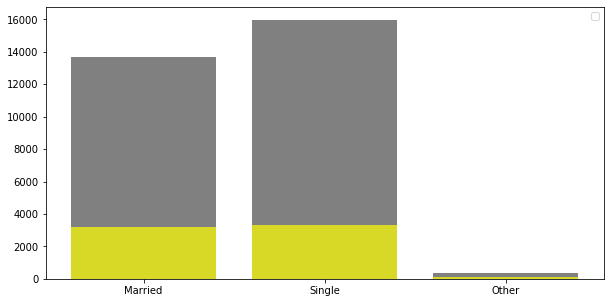

Percentage of Married Default is 23.471703638626547 %
Percentage of Single Default is 20.928338762214985 %
Percentage of Others Default is 22.281167108753316 %


In [732]:
# 1=married, 2=single, 3=others
# preparing the vairable for the diagram
print("Marriage / Default")
_MARRIAGE_RANGE= [1,2,3]
plt.figure(figsize=(10,5))

married= df['MARRIAGE'][data['MARRIAGE']==1].count()
married_default = df['MARRIAGE'][(df['MARRIAGE']==1)&(df['default payment next month']==1)].count()

single=df['MARRIAGE'][data['MARRIAGE']==2].count()
single_default = df['MARRIAGE'][(df['MARRIAGE']==2)&(df['default payment next month']==1)].count()

others=df['MARRIAGE'][data['MARRIAGE']==3].count()
others_default = df['MARRIAGE'][(df['MARRIAGE']==3)&(df['default payment next month']==1)].count()


marriage_total = [married,single,others]
default_marriage_total = [married_default,single_default,others_default]

plt.bar(_MARRIAGE_RANGE,marriage_total, color='grey')
plt.bar(_MARRIAGE_RANGE,default_marriage_total, color='yellow',alpha = 0.7)
plt.xticks([1,2,3],['Married','Single','Other'])
plt.legend()
plt.show()

calculate_percentage(married,married_default,"Married Default")
calculate_percentage(single,single_default,"Single Default")
calculate_percentage(others,others_default,"Others Default")



##### AGE

Age / Default


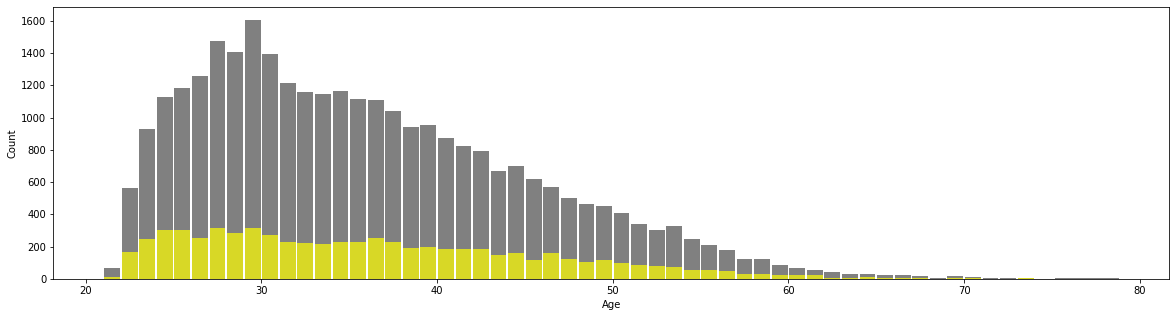

Percentage of 21 is 20.895522388059703 %
Percentage of 22 is 30.178571428571427 %
Percentage of 23 is 26.53061224489796 %
Percentage of 24 is 26.619343389529725 %
Percentage of 25 is 25.463743676222595 %
Percentage of 26 is 20.143312101910826 %
Percentage of 27 is 21.19160460392688 %
Percentage of 28 is 20.298083747338538 %
Percentage of 29 is 19.501557632398754 %
Percentage of 30 is 19.6415770609319 %
Percentage of 31 is 18.816762530813477 %
Percentage of 32 is 19.430051813471504 %
Percentage of 33 is 18.760907504363 %
Percentage of 34 is 19.879518072289155 %
Percentage of 35 is 20.305480682839175 %
Percentage of 36 is 22.924187725631768 %
Percentage of 37 is 21.998078770413063 %
Percentage of 38 is 20.550847457627118 %
Percentage of 39 is 20.859538784067087 %
Percentage of 40 is 21.49425287356322 %
Percentage of 41 is 22.45145631067961 %
Percentage of 42 is 23.299748110831235 %
Percentage of 43 is 22.388059701492537 %
Percentage of 44 is 23.142857142857142 %
Percentage of 45 is 18.80

In [733]:
print("Age / Default")
plt.figure(figsize=(20,5))
plt.hist(data['AGE'], sorted(data['AGE'].unique()),rwidth=0.9, color ='grey')
plt.hist(df['AGE'][(df['default payment next month']==1)], sorted(data['AGE'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

age_persentage_dataframe = pd.DataFrame(columns=['Age', 'Percentage'])

for x in sorted(data['AGE'].unique()):
    calculate_percentage(
                         df['AGE'][df['AGE']==x ].count(),df['AGE'][(df['AGE']==x )&(df['default payment next month']==1)].count(), x
                               )



##### LIMIT_BAL



Limit Balance / Default


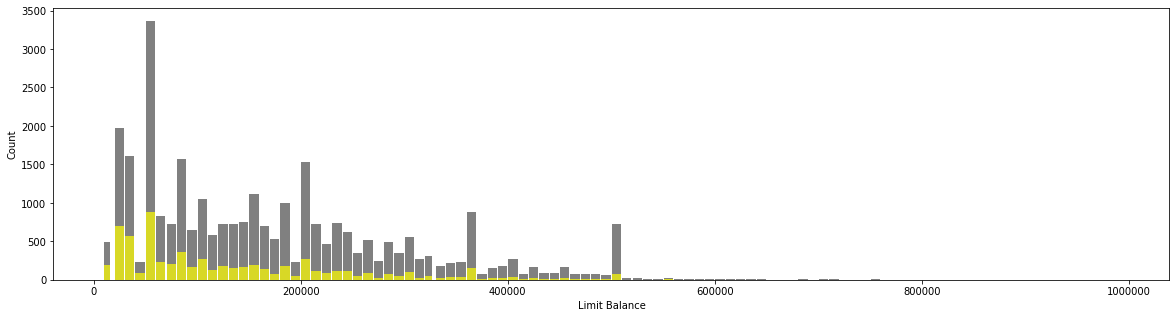

<Figure size 1440x72 with 0 Axes>

In [734]:

print("Limit Balance / Default")
plt.figure(figsize=(20,5))
plt.hist(data['LIMIT_BAL'], sorted(data['LIMIT_BAL'].unique()),rwidth=0.9, color ='grey')
plt.hist(df['LIMIT_BAL'][(df['default payment next month']==1)], sorted(data['LIMIT_BAL'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.figure(figsize=(20,1))
plt.show()

The people with high LIMIT_BAL are lesser number in defaulters

##### PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6


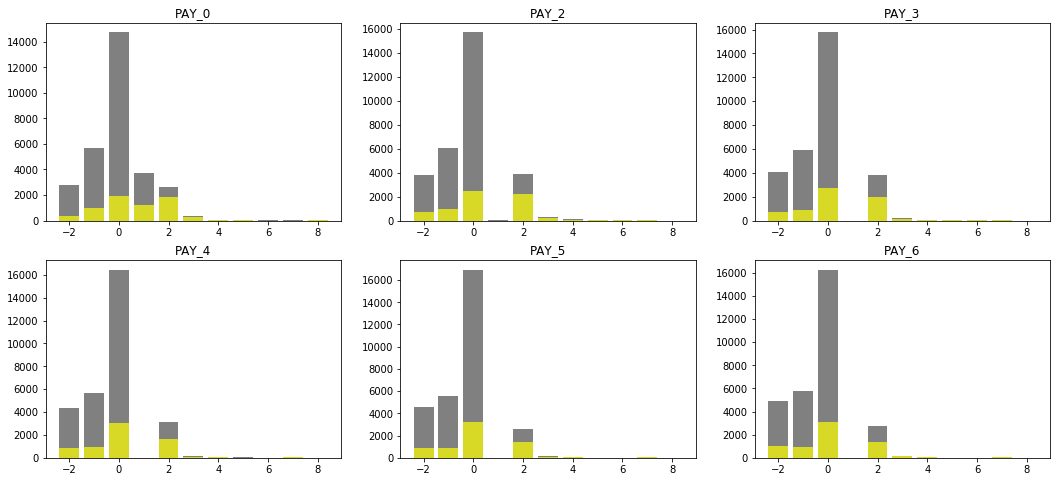

In [735]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in [0,2,3,4,5,6]]

pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['default payment next month']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='grey')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

##### PAY_AMT

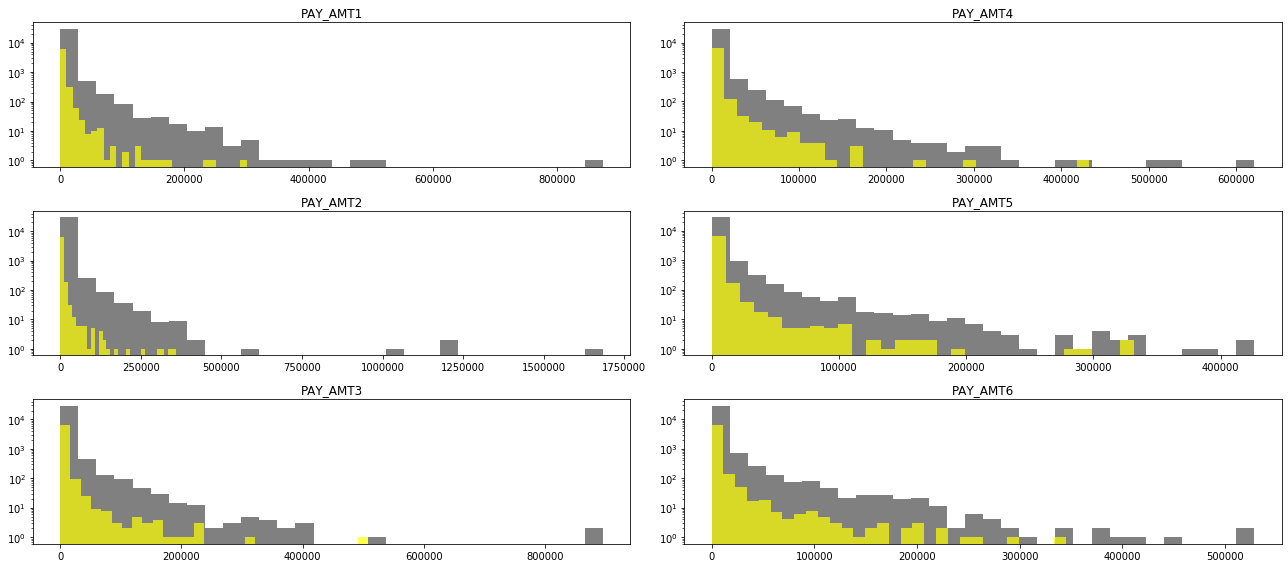

In [736]:
def getColumnsNames1(prefix):
    return [prefix+str(x) for x in [1,2,3,4,5,6]]


pay_amt_columns = getColumnsNames1('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='grey')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['default payment next month']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

As the pay_amt increases the number of defaulters decreases

##### BILL_AMT

bill_atm_columns =  getColumnsNames1('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[bill_atm_columns[i]], 20,rwidth=0.9, color ='grey')
    ax[row,col].hist(df[bill_atm_columns[i]][(df['default payment next month']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()


As the BILL_AMT increases the number of Defaulters reduces

### Bivariate Analysis

In [737]:
pd.crosstab(df['SEX'],df['default payment next month'])

default payment next month,0,1
SEX,,
0,9015,2873
1,14349,3763


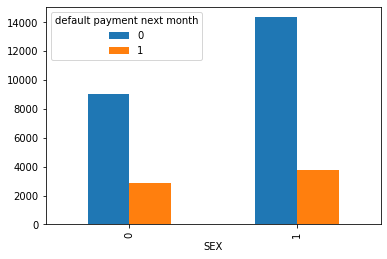

In [738]:
pd.crosstab(df['SEX'],df['default payment next month']).plot(kind='bar')

 Hence, the number of Female defaulters are more than the number of Male defaulters.

In [739]:
pd.crosstab(df1['EDUCATION'],df1['default'])

default,0,1
EDUCATION,,
1,9225,1360
2,11627,2403
3,3990,927
4,458,10


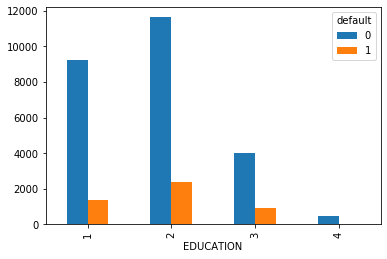

In [740]:
pd.crosstab(df1['EDUCATION'],df1['default']).plot(kind='bar')

We can see that the defaulter are properly educated and have gone high school , university or graduate school.Rest of them who have defaulted are in very small numbers.

In [741]:
pd.crosstab(df1['MARRIAGE'],df1['default'])

default,0,1
MARRIAGE,,
1,11425,2234
2,13560,2404
3,315,62


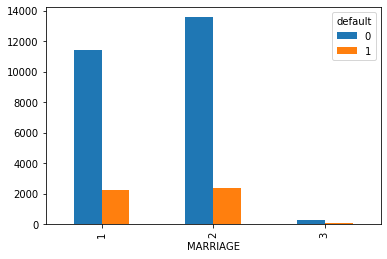

In [742]:
pd.crosstab(df1['MARRIAGE'],df1['default']).plot(kind='bar')

Defaulters amoung married and unmarried people is almost same.So,therefore we cannot infer much from that.

In [743]:
pd.crosstab(df1[df1['AGE']<40]['AGE'],df1['default'])

default,0,1
AGE,,
21,57,10
22,435,125
23,744,187
24,883,244
25,959,227
26,1063,193
27,1244,233
28,1196,213
29,1383,222


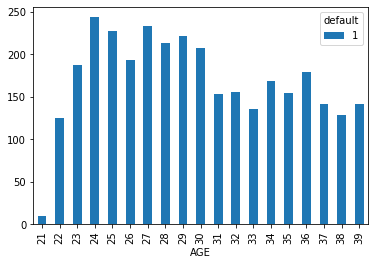

In [744]:
pd.crosstab(df1[df1['AGE']<40]['AGE'],df1[df1['default']==1]['default']).plot(kind='bar')

In [745]:
pd.crosstab(df1[df1['AGE']>40]['AGE'],df1['default'])

default,0,1
AGE,,
41,706,118
42,659,135
43,562,108
44,595,105
45,536,81
46,462,108
47,411,90
48,395,71
49,375,77


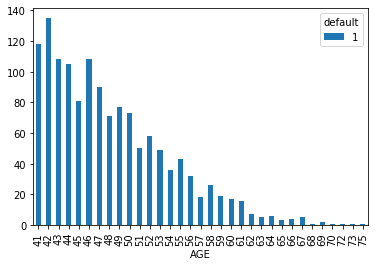

In [746]:
pd.crosstab(df1[df1['AGE']>40]['AGE'],df1[df1['default']==1]['default']).plot(kind='bar')

Here , in repayment status most of them come under the payed duly or not using the card status.We can see some outliers also who have not payed the credit card bill for 8 months to maximum.

### Multivariate Analysis

 Checking Correlation among the columns with similar names

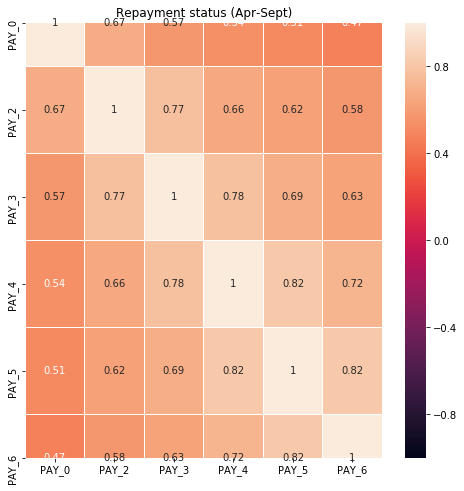

In [747]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,annot=True)
plt.show()


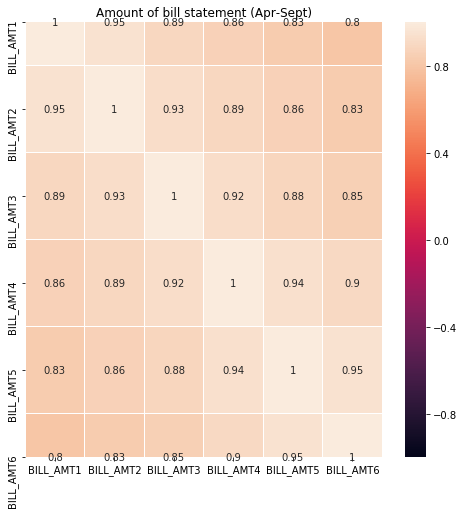

In [748]:
var = [ 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept)')
corr = df1[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,annot=True)
plt.show()


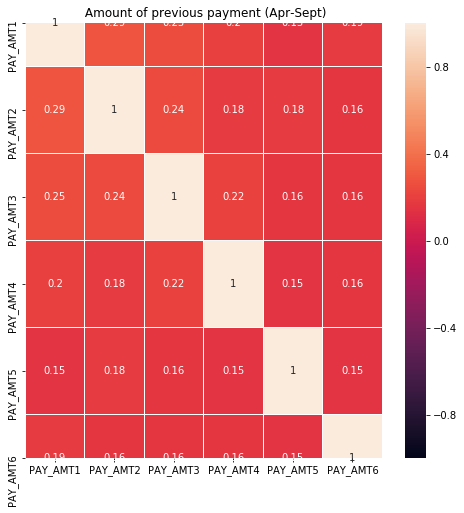

In [749]:
var = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize = (8,8))
plt.title(' Amount of previous payment (Apr-Sept)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,annot=True)
plt.show()

 Hence, we observe high correlation between the columns with similar names.

### Multi-Collinearity

In [750]:
X = df1.drop(["default"],axis=1)

In [800]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["features"] = df1[numerical].columns
vif["VIF Factor"] = [variance_inflation_factor(df1[numerical].values, i) for i in range(df1[numerical].shape[1])]
vif

,features,VIF Factor
0,LIMIT_BAL,1.230718
1,AGE,1.022210
2,BILL_AMT1,13.987490
3,BILL_AMT2,25.808337
4,BILL_AMT3,21.829915
5,BILL_AMT4,20.319007
6,BILL_AMT5,25.156884
7,BILL_AMT6,15.195381
8,PAY_AMT1,1.672528
9,PAY_AMT2,2.210902


As we cannot see much have a high variance inflation factor here we can assume that there is no much multicolinearity between the variables.

### Distribution of variables

 Distribution Plot of  LIMIT_BAL


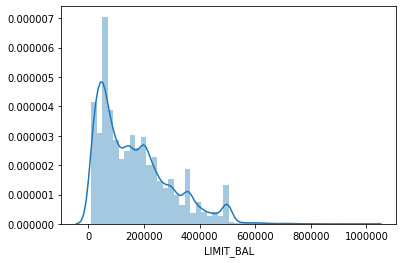

 Distribution Plot of  SEX


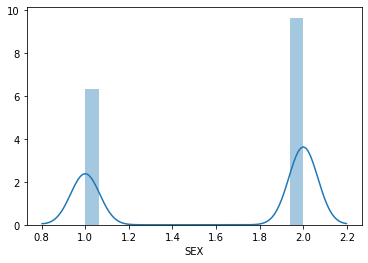

 Distribution Plot of  EDUCATION


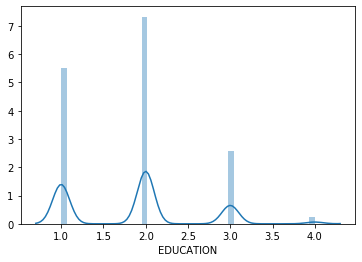

 Distribution Plot of  MARRIAGE


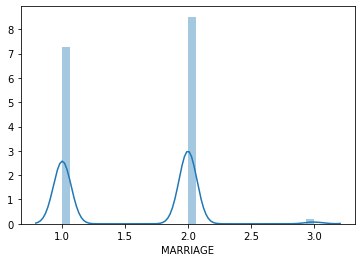

 Distribution Plot of  AGE


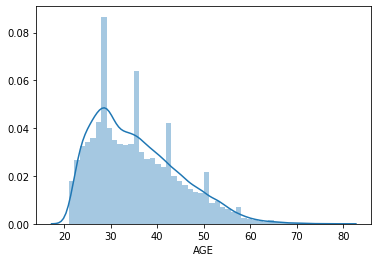

 Distribution Plot of  PAY_1


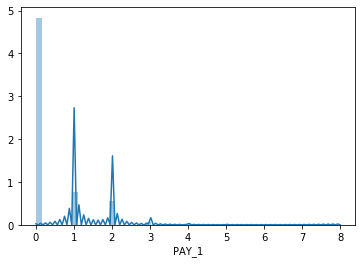

 Distribution Plot of  PAY_2


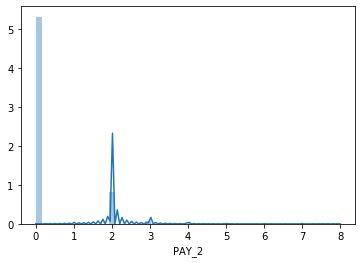

 Distribution Plot of  PAY_3


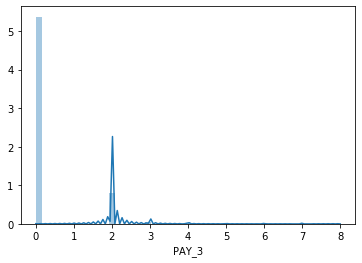

 Distribution Plot of  PAY_4


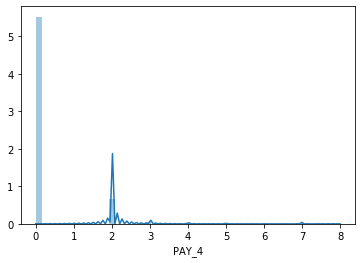

 Distribution Plot of  PAY_5


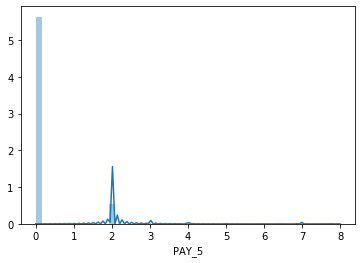

 Distribution Plot of  PAY_6


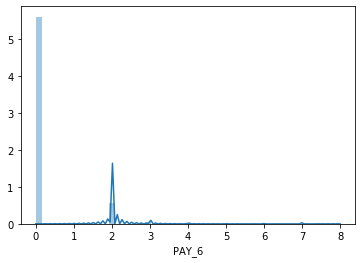

 Distribution Plot of  BILL_AMT1


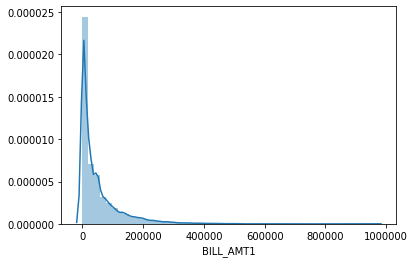

 Distribution Plot of  BILL_AMT2


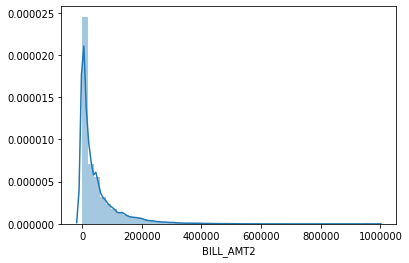

 Distribution Plot of  BILL_AMT3


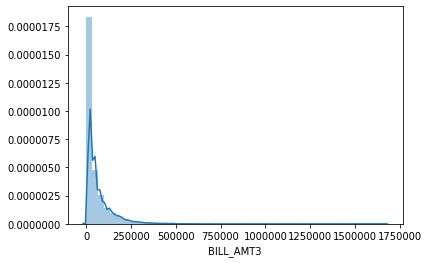

 Distribution Plot of  BILL_AMT4


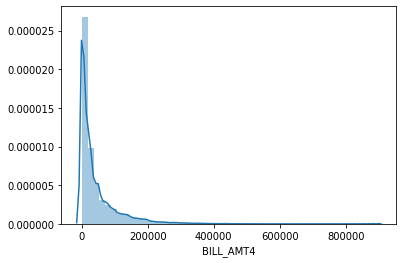

 Distribution Plot of  BILL_AMT5


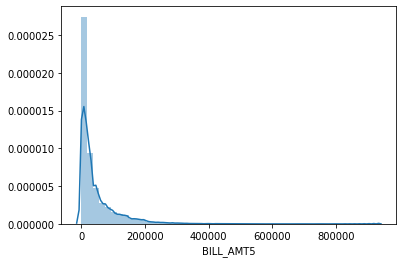

 Distribution Plot of  BILL_AMT6


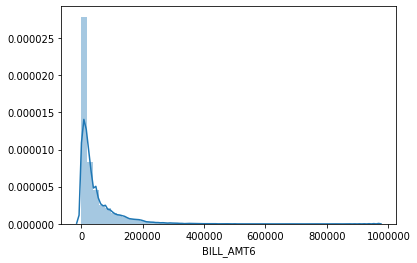

 Distribution Plot of  PAY_AMT1


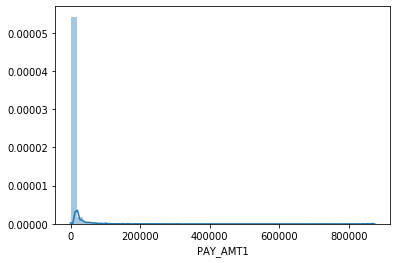

 Distribution Plot of  PAY_AMT2


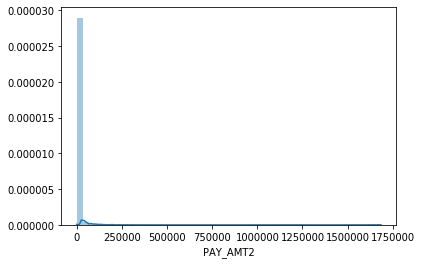

 Distribution Plot of  PAY_AMT3


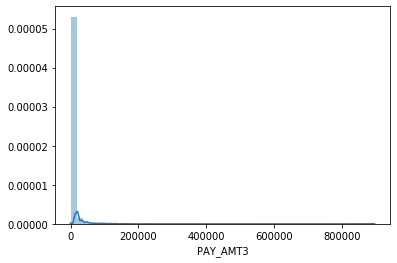

 Distribution Plot of  PAY_AMT4


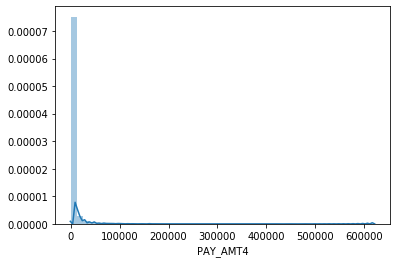

 Distribution Plot of  PAY_AMT5


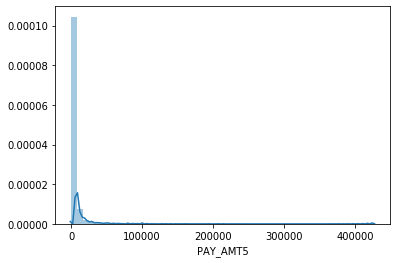

 Distribution Plot of  PAY_AMT6


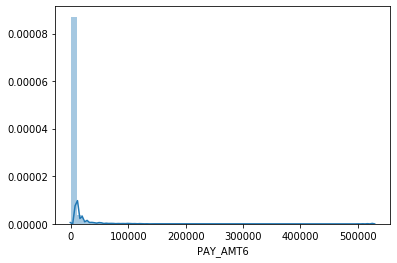

 Distribution Plot of  default


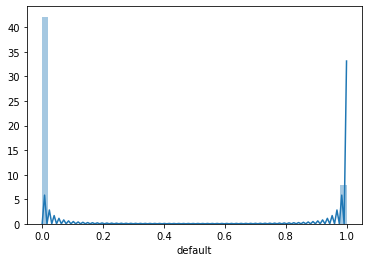

In [752]:
for cols in df1.columns:
    sns.distplot(df1[cols])
    print(' Distribution Plot of ',cols)
    plt.show()

Most of the data in the column LIMIT_BAL is concentrated between 0 and 100000

This data contains more males as compared to females

Most of the customers education qualification is university

Most of the customers are single

Most of the customers are concentrated at around 30 years of age

 Box Plot of LIMIT_BAL


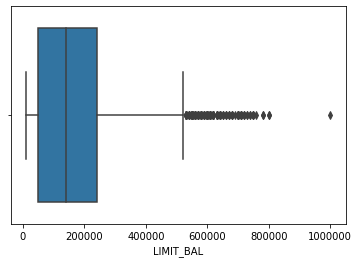

 Box Plot of AGE


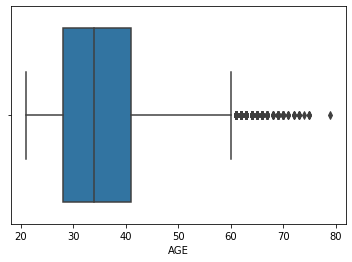

 Box Plot of BILL_AMT1


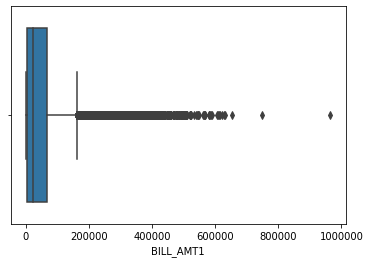

 Box Plot of BILL_AMT2


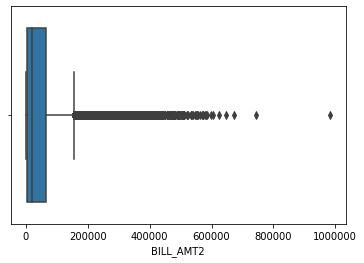

 Box Plot of BILL_AMT3


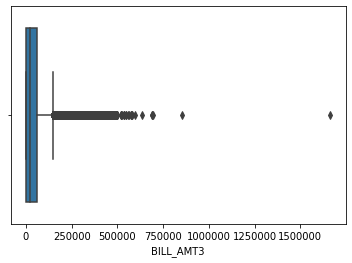

 Box Plot of BILL_AMT4


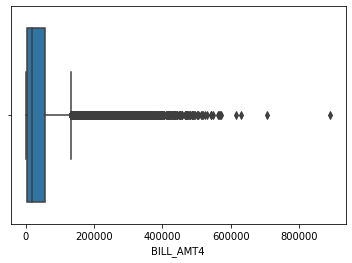

 Box Plot of BILL_AMT5


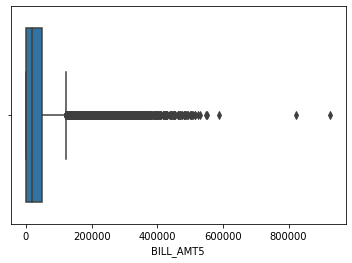

 Box Plot of BILL_AMT6


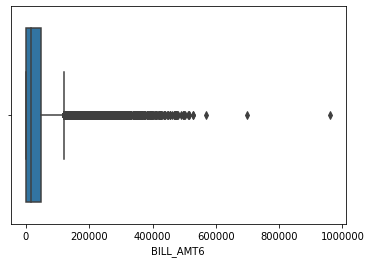

 Box Plot of PAY_AMT1


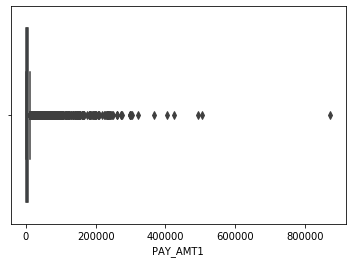

 Box Plot of PAY_AMT2


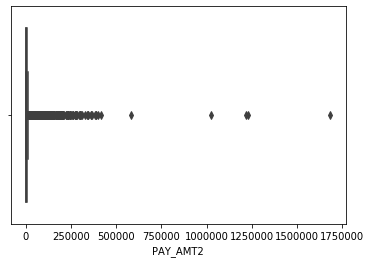

 Box Plot of PAY_AMT3


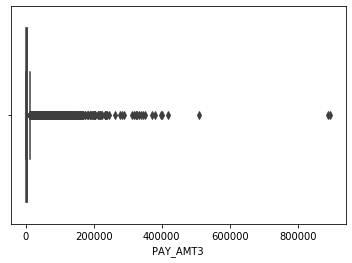

 Box Plot of PAY_AMT4


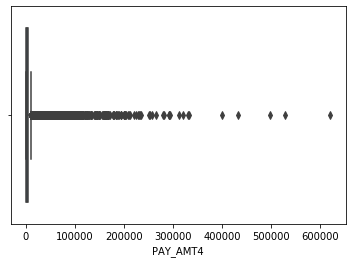

 Box Plot of PAY_AMT5


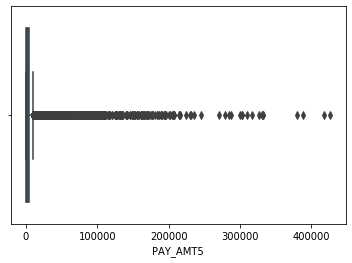

 Box Plot of PAY_AMT6


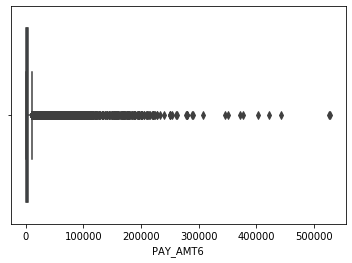

In [753]:
for cols in numerical:
    sns.boxplot(df1[cols])
    print(' Box Plot of',cols)
    plt.show()

#####  From the boxplot we can find that LIMIT_BAL,EDUCATION,PAY_0,PAY_2,PAY3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT_1,PAY_AMT_2,PAY_AMT_3,PAY_AMT_4,PAY_AMT_5,PAY_AMT6 contains outliers.



### Statistical significance of variables

In [754]:
df1[["LIMIT_BAL","AGE"]].describe()

,LIMIT_BAL,AGE
count,30000.000000,30000.000000
mean,167484.322667,35.485500
std,129747.661567,9.217904
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


Inference:
In limit balance we can see that 75 % of the people have their balance in 2,40,000 and the maximum 10,00,000
People whi have taken credit card are 75% uptill the age 41 and the max ages is 79.

In [755]:
df1[['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


In [756]:
df1[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.00000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51246.04190,49206.518033,4.704517e+04,43299.651933,40347.092100,38942.268767
std,73608.02908,71150.744613,6.931878e+04,64294.968472,60766.619726,59445.970807
min,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3558.75000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.50000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.00000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.00000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [757]:
df1[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### Class Imbalance check

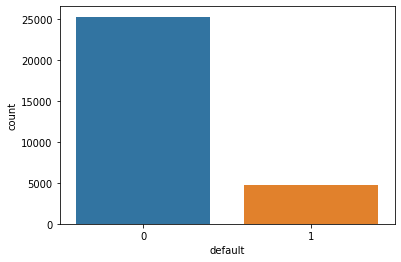

In [758]:
sns.countplot(df1.default)

In [759]:
df1['default'].value_counts()/len(df1)*100

0    84.333333
1    15.666667
Name: default, dtype: float64

- Since, the data is highly imbalanced. Therefore, we proceed with SMOTE method of sampling the data.

# Feature Engineering

In [760]:
categorical = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numerical = ['LIMIT_BAL','AGE' ,'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Outliers

In [761]:
print("No of Outliers Record");print()
for i in df1[numerical]:
    u = df1[i].quantile(0.75) + 1.5*(df1[i].quantile(0.75)-df1[i].quantile(0.25))
    print(i , " : " , df1[df1[i] > u][i].count())

No of Outliers Record

LIMIT_BAL  :  167
AGE  :  272
BILL_AMT1  :  2398
BILL_AMT2  :  2395
BILL_AMT3  :  2468
BILL_AMT4  :  2620
BILL_AMT5  :  2724
BILL_AMT6  :  2688
PAY_AMT1  :  2745
PAY_AMT2  :  2714
PAY_AMT3  :  2598
PAY_AMT4  :  2994
PAY_AMT5  :  2945
PAY_AMT6  :  2958


# Transformation

- Since the data contains lots of 0's we cannot apply log transformation or square root transformation or exponential transformation. Therefore, we proceed with the Scaling of the numerical data.

# Statistical Testing

In [762]:
from scipy.stats import chi2, chi2_contingency

In [763]:
categorical = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [764]:
chi_pvalue=[]
chi_name=[]

def chi_sq(cat):
    cont = pd.crosstab(df1['default'],df1[cat])
    chi_pvalue.append(chi2_contingency(cont)[1])
    chi_name.append(cat)
for cat in categorical:
    chi_sq(cat)
    chi_data=pd.DataFrame()
    chi_data['Pvalue']=chi_pvalue
    chi_data.index=chi_name

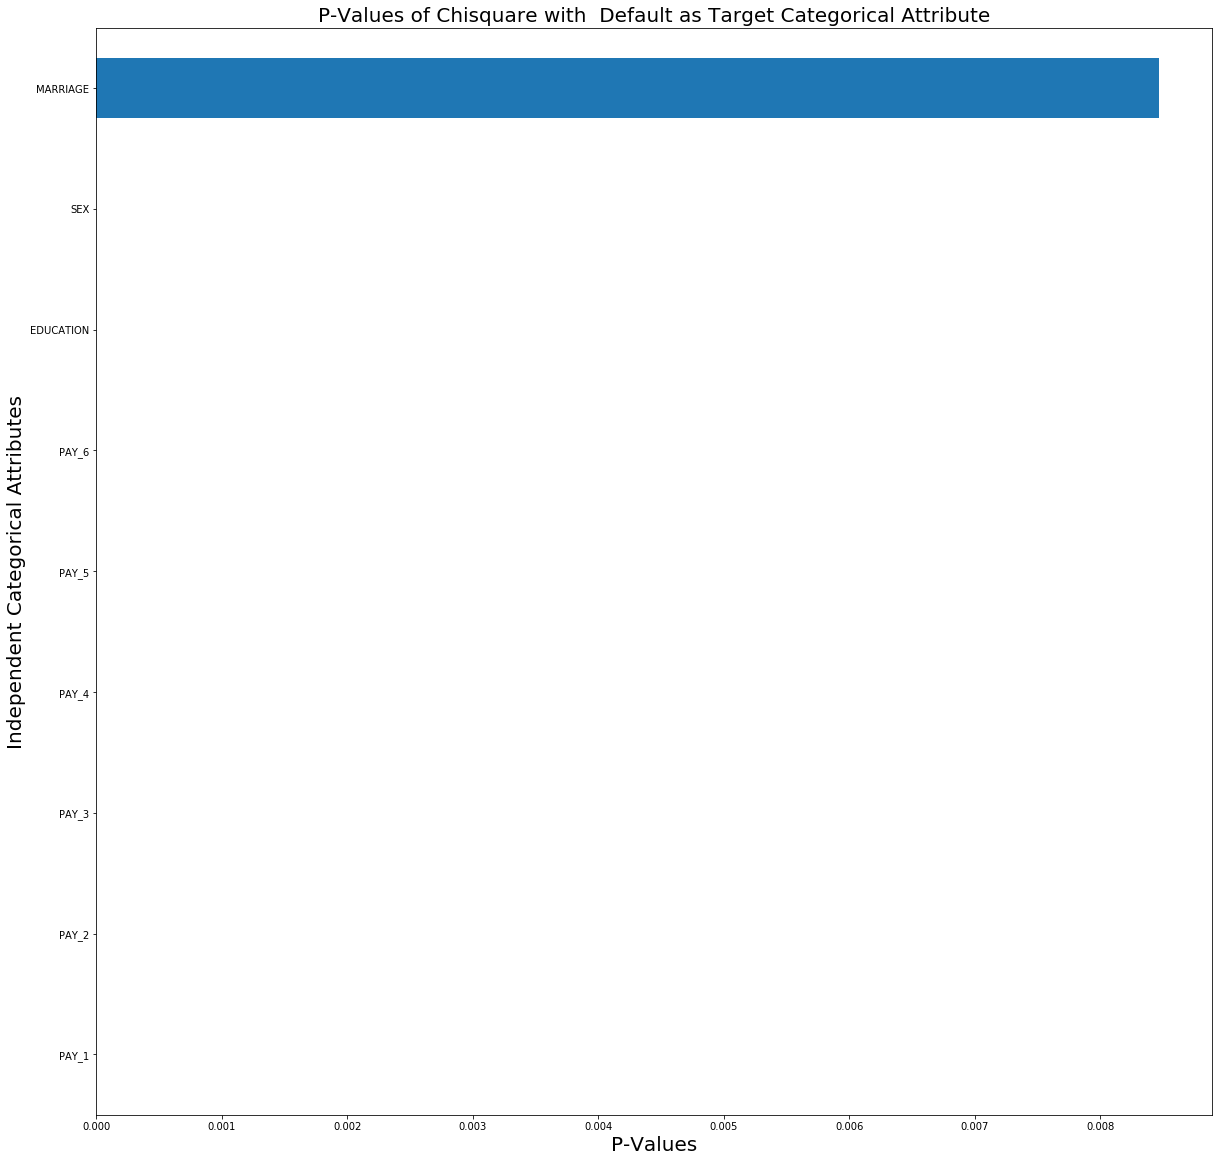

In [765]:
plt.figure(figsize=(20,20))

plt.title('P-Values of Chisquare with '' Default'' as Target Categorical Attribute',fontsize=20)

x=chi_data.Pvalue.sort_values().plot(kind='barh')

x.set_xlabel('P-Values',fontsize=20)

x.set_ylabel('Independent Categorical Attributes',fontsize=20)

plt.show()

- Since, we observe from chi2 test that Marriage column is of least importance as p_val is > 0.05 while all the other columns have p_val < 0.05 and hence, the other columns are important for our modeling.

In [766]:
X = df1.drop('default',axis=1)
Y = df1['default']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=23)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))

        Specs         Score
0   LIMIT_BAL  1.057492e+08
18   PAY_AMT2  9.582460e+06
17   PAY_AMT1  8.290986e+06
22   PAY_AMT6  6.986573e+06
20   PAY_AMT4  6.067629e+06
19   PAY_AMT3  6.039725e+06
21   PAY_AMT5  5.947016e+06
16  BILL_AMT6  2.106857e+06
15  BILL_AMT5  1.726431e+06
11  BILL_AMT1  9.045943e+05
14  BILL_AMT4  5.777365e+05
12  BILL_AMT2  8.573634e+04
5       PAY_1  1.890309e+04
6       PAY_2  1.848116e+04
7       PAY_3  1.588063e+04
8       PAY_4  1.584077e+04
9       PAY_5  1.580411e+04
10      PAY_6  1.393191e+04
13  BILL_AMT3  1.922741e+02
2   EDUCATION  1.476439e+01


- The above are the top 20 features of the dataset

# Statistical Modelling

# Adding constants to the x_train and x_test

In [767]:
x_trainc = sm.add_constant(x_train)
x_testc = sm.add_constant(x_test)

In [768]:
logit_model = sm.Logit(y_train,x_trainc)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.219637
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20976
Method:                           MLE   Df Model:                           23
Date:                Thu, 28 Nov 2019   Pseudo R-squ.:                  0.4960
Time:                        16:20:13   Log-Likelihood:                -4612.4
converged:                       True   LL-Null:                       -9151.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8386      0.163    -17.405      0.000      -3.158      -2.519
LIMIT_BAL     -0.1420      0.038     -3.786      0.000      -0.216      -0.069
SEX           -0.0738      0.057     -1.284      0.199      -0.186       0.039
EDUCATION     -0.2070      0.042     -4.962      0.000      -0.289      -0.125
MARRIAGE      -0.1558      0.060     -2.603      0.009      -0.273      -0.039
AGE            0.0734      0.031      2.392      0.017       0.013       0.134
PAY_1          1.6822      0.039     42.827      0.000       1.605       1.759
PAY_2          0.1918      0.038      5.063      0.000       0.118       0.266
PAY_3          0.3691      0.043      8.526      0.000       0.284       0.454
PAY_4          0.3588      0.048      7.471      0.000       0.265       0.453
PAY_5          0.2774      0.051      5.447      0.000       0.178       0.377
PAY_6          0.6498      0.043     15.102      0.000       0.565       0.734
BILL_AMT1     -0.5782      0.178     -3.241      0.001      -0.928      -0.229
BILL_AMT2      0.6335      0.204      3.100      0.002       0.233       1.034
BILL_AMT3     -0.2263      0.185     -1.221      0.222      -0.590       0.137
BILL_AMT4      0.0523      0.178      0.294      0.769      -0.296       0.401
BILL_AMT5      0.2896      0.177      1.633      0.103      -0.058       0.637
BILL_AMT6     -0.1589      0.135     -1.174      0.240      -0.424       0.106
PAY_AMT1      -0.2100      0.073     -2.867      0.004      -0.354      -0.066
PAY_AMT2      -0.2552      0.110     -2.315      0.021      -0.471      -0.039
PAY_AMT3      -0.0409      0.053     -0.771      0.441      -0.145       0.063
PAY_AMT4      -0.1301      0.062     -2.101      0.036      -0.251      -0.009
PAY_AMT5      -0.1136      0.067     -1.699      0.089      -0.245       0.017
PAY_AMT6      -0.2342      0.058     -4.021      0.000      -0.348      -0.120
==============================================================================
"""

In [769]:
y_prob = result.predict(x_testc)
y_prob.head()

2308     0.033607
22404    0.027917
23397    0.029415
25058    0.027317
2664     0.078943
dtype: float64

In [770]:
y_test_data = pd.DataFrame(y_test)
y_test_data['prob'] = y_prob

In [771]:
y_test_data['y_pred'] = y_test_data['prob'].apply(lambda x:1 if x>=0.1 else 0)
y_test_data

,default,prob,y_pred
2308,0,0.033607,0
22404,0,0.027917,0
23397,0,0.029415,0
25058,0,0.027317,0
2664,1,0.078943,0
...,...,...,...
3941,1,0.133603,1
17854,0,0.028721,0
95,0,0.030076,0
6279,0,0.029615,0


In [772]:
cm = confusion_matrix(y_test_data['default'],y_test_data['y_pred'])
cm

array([[6451, 1160],
       [ 128, 1261]], dtype=int64)

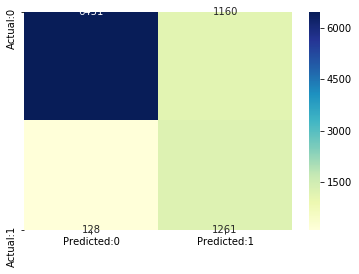

In [773]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [774]:
fpr,tpr,threshold = roc_curve(y_test_data['default'],y_test_data['prob'])

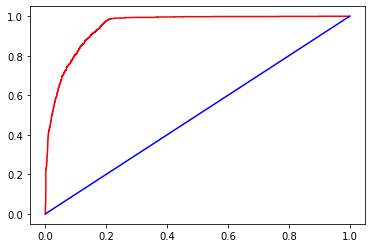

In [775]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')
plt.show()

In [776]:
roc_auc_score(y_test_data['default'],y_test_data['prob'])

0.9494643187709351

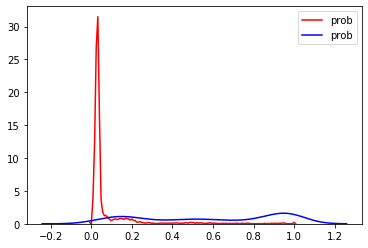

In [777]:
df2 = y_test_data[y_test_data['default']==0]
df3 = y_test_data[y_test_data['default']==1]
sns.kdeplot(df2['prob'],color='r')
sns.kdeplot(df3['prob'],color='b')

# Standardizing the numerical data

In [778]:
SS = StandardScaler()

In [779]:
df1[numerical] = pd.DataFrame(SS.fit_transform(df1[numerical]))

In [780]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,-1.136720,2,2,1,-1.246020,2,2,0,0,0,...,-0.673464,-0.663979,-0.655098,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,2,2,2,-1.029047,0,2,0,0,0,...,-0.622573,-0.607121,-0.600240,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,2,2,2,-0.161156,0,0,0,0,0,...,-0.450566,-0.417985,-0.393528,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,2,2,1,0.164303,0,0,0,0,0,...,-0.233080,-0.187410,-0.158050,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,1,2,1,2.334029,0,0,0,0,0,...,-0.347773,-0.348900,-0.333271,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


# Applying SMOTE

In [781]:
from imblearn.over_sampling import SMOTE

x = df1.drop('default',axis=1)
y = df1['default']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

smt = SMOTE(random_state=33)
x_train_new, y_train_new = smt.fit_sample(x_train, y_train.ravel())
from collections import Counter
print(sorted(Counter(y_train_new).items()))

[(0, 17689), (1, 17689)]


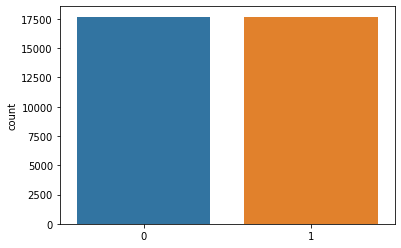

In [782]:
sns.countplot(y_train_new)

- Therefore, we have equal number of 0's and 1's in our dataset. 

# Machine Learning Modelling

# Logistic Regression

In [783]:
log_reg = LogisticRegression()

In [784]:
log_reg.fit(x_train_new,y_train_new)
log_reg_train_score = log_reg.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',log_reg_train_score)

Training Accuracy Score :  0.8709932726553226


In [785]:
y_pred_lg = log_reg.predict(x_test)
log_reg_test_score = accuracy_score(y_test,y_pred_lg)
print('Testing Accuracy Score : ',log_reg_test_score)

Testing Accuracy Score :  0.8788888888888889


In [786]:
cm = confusion_matrix(y_test,y_pred_lg)
cm

array([[6743,  868],
       [ 222, 1167]], dtype=int64)

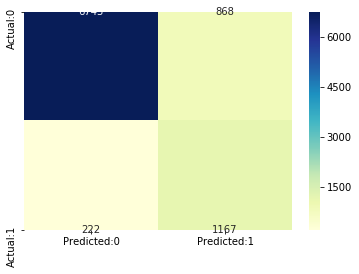

In [787]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [788]:
log_reg_f1_score = f1_score(y_test,y_pred_lg)
print(log_reg_f1_score)

0.6816588785046729


In [789]:
log_reg_precision_score = precision_score(y_test,y_pred_lg)
print(log_reg_precision_score)

0.5734643734643735


In [790]:
log_reg_recall_score = recall_score(y_test,y_pred_lg)
print(log_reg_recall_score)

0.8401727861771058


In [791]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7611
           1       0.57      0.84      0.68      1389

    accuracy                           0.88      9000
   macro avg       0.77      0.86      0.80      9000
weighted avg       0.91      0.88      0.89      9000



In [792]:
y_prob = log_reg.predict_proba(x_test)[:,1]
y_prob

array([0.11846515, 0.07278648, 0.09127547, ..., 0.08676159, 0.08591441,
       0.1002977 ])

In [793]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

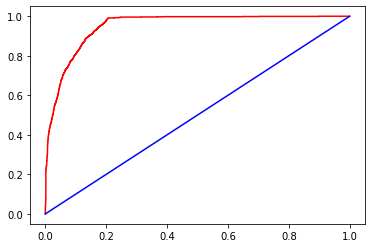

In [794]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')
plt.show()

In [795]:
log_reg_roc = roc_auc_score(y_test,y_prob)
print(log_reg_roc)

0.9497297449156372


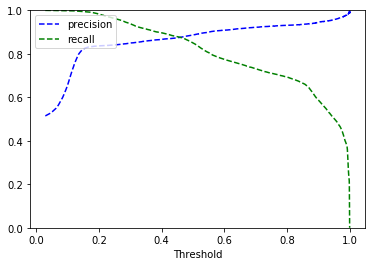

In [799]:
from sklearn.metrics import precision_recall_curve
y_scores=log_reg.predict_proba(x_train_new)
prec, rec, tre = precision_recall_curve(y_train_new, y_scores[:,1], )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

# Hyper Parameter Tuning

In [498]:
param_grid = [{'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6],'penalty':['l1','l2']}]

In [499]:
gs = GridSearchCV(log_reg,param_grid,cv=3,scoring='accuracy')
gs.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [500]:
gs.best_params_

{'C': 1.6, 'penalty': 'l2'}

In [501]:
gs.best_score_

0.9081428571428571

In [502]:
log_reg_gs = LogisticRegression(**gs.best_params_) 

In [503]:
log_reg_gs.fit(x_train_new,y_train_new)
log_reg_train_hp = log_reg_gs.score(x_train_new,y_train_new)
print(log_reg_train_hp)

0.8711346034258579


In [504]:
y_pred1 = log_reg_gs.predict(x_test)
log_reg_test_hp = accuracy_score(y_test,y_pred1)
print(log_reg_test_hp)

0.8788888888888889


In [505]:
cm = confusion_matrix(y_test,y_pred1)
cm

array([[6743,  868],
       [ 222, 1167]], dtype=int64)

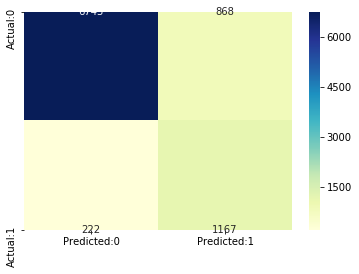

In [506]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [507]:
log_reg_f1_score_hp = f1_score(y_test,y_pred1)
print(log_reg_f1_score_hp)

0.6816588785046729


In [508]:
log_reg_precision_score_hp = precision_score(y_test,y_pred1)
print(log_reg_precision_score_hp)

0.5734643734643735


In [509]:
log_reg_recall_score_hp = recall_score(y_test,y_pred1)
print(log_reg_recall_score_hp)

0.8401727861771058


In [510]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7611
           1       0.57      0.84      0.68      1389

    accuracy                           0.88      9000
   macro avg       0.77      0.86      0.80      9000
weighted avg       0.91      0.88      0.89      9000



In [511]:
y_prob = log_reg_gs.predict_proba(x_test)[:,1]
y_prob

array([0.11834601, 0.0726278 , 0.09123597, ..., 0.08663395, 0.08585593,
       0.10014891])

In [512]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

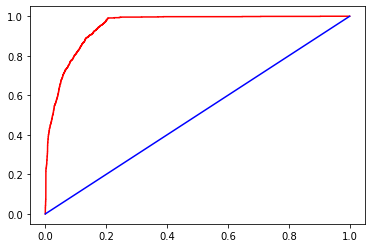

In [513]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [597]:
log_reg_roc_hp = roc_auc_score(y_test,y_prob)
print(log_reg_roc_hp)

0.9108257543574677


# KNN Model

In [515]:
knn = KNeighborsClassifier()
knn.fit(x_train_new,y_train_new)
knn_train_score = knn.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',knn_train_score)

Training Accuracy Score :  0.9437786194810334


In [516]:
y_pred_knn = knn.predict(x_test)
knn_test_score = accuracy_score(y_test,y_pred_knn)
print('Testing Accuracy Score',knn_test_score)

Testing Accuracy Score 0.862


In [517]:
cm = confusion_matrix(y_test,y_pred_knn)
cm

array([[6580, 1031],
       [ 211, 1178]], dtype=int64)

In [518]:
knn_f1_score = f1_score(y_test,y_pred_knn)
print(knn_f1_score)

0.6548082267926626


In [519]:
knn_recall_score = recall_score(y_test,y_pred_knn)
print(knn_recall_score)

0.8480921526277898


In [520]:
knn_precision_score = precision_score(y_test,y_pred_knn)
print(knn_precision_score)

0.533272974196469


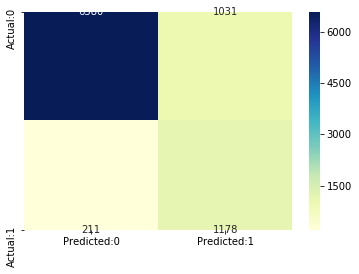

In [521]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [522]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      7611
           1       0.53      0.85      0.65      1389

    accuracy                           0.86      9000
   macro avg       0.75      0.86      0.78      9000
weighted avg       0.90      0.86      0.87      9000



In [523]:
y_prob = knn.predict_proba(x_test)[:,1]
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [524]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

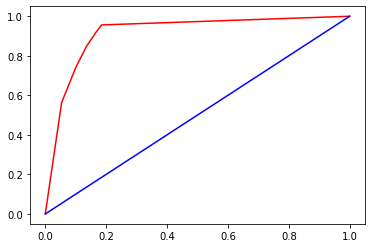

In [525]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [526]:
knn_roc = roc_auc_score(y_test,y_prob)
print(knn_roc)

0.9153546943678483


- Since, the available hardware doesn't support the hyper parameter tuning of KNN hence, we are not applying hyper parameter tuning for the KNN model.

# Decision Tree

In [527]:
dt = DecisionTreeClassifier()
dt.fit(x_train_new,y_train_new)
dt_train_score = dt.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',dt_train_score)

Training Accuracy Score :  0.9997738707671434


In [528]:
y_pred_dt = dt.predict(x_test)
dt_test_score = accuracy_score(y_test,y_pred_dt)
print('Testing Accuracy Score : ',dt_test_score)

Testing Accuracy Score :  0.8776666666666667


In [529]:
cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[6952,  659],
       [ 442,  947]], dtype=int64)

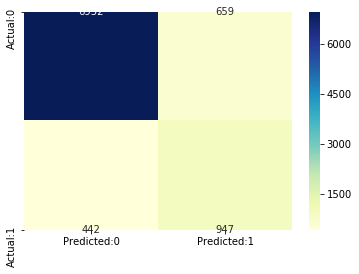

In [530]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [531]:
dt_f1_score = f1_score(y_test,y_pred_dt)
print(dt_f1_score)

0.6323873121869783


In [532]:
dt_precision_score = precision_score(y_test,y_pred_dt)
print(dt_precision_score)

0.5896637608966376


In [533]:
dt_recall_score = recall_score(y_test,y_pred_dt)
print(dt_recall_score)

0.681785457163427


In [534]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7611
           1       0.59      0.68      0.63      1389

    accuracy                           0.88      9000
   macro avg       0.76      0.80      0.78      9000
weighted avg       0.89      0.88      0.88      9000



In [535]:
y_prob = dt.predict_proba(x_test)[:,1]
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [536]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

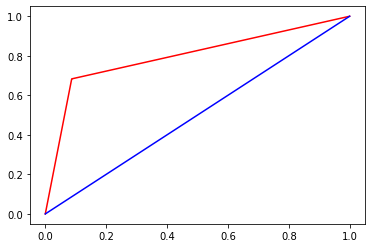

In [537]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [538]:
dt_roc = roc_auc_score(y_test,y_prob)
print(dt_roc)

0.7981740175803673


# Hyper Parameter Tuning

In [539]:
params = {
    'max_depth' : np.arange(3,10),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : [5,10,20,100],
    'min_samples_split' : [2,5,10,20]
}

In [541]:
gs = GridSearchCV(dt,params,cv=3,scoring='accuracy')
gs.fit(x_train_new,y_train_new)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
         

In [542]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_leaf_nodes': 100,
 'min_samples_split': 10}

In [543]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(x_train_new,y_train_new)
dt_train_hp = dt.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',dt_train_hp)

Training Accuracy Score :  0.922098479280909


In [544]:
y_pred_dt = dt.predict(x_test)
dt_test_hp = accuracy_score(y_test,y_pred_dt)
print('Testing Accuracy Score : ',dt_test_hp)

Testing Accuracy Score :  0.8631111111111112


In [545]:
cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[6528, 1083],
       [ 149, 1240]], dtype=int64)

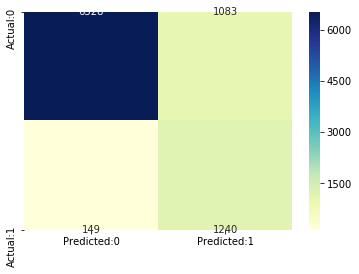

In [546]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [547]:
dt_f1_score_hp = f1_score(y_test,y_pred_dt)
print(dt_f1_score_hp)

0.6681034482758621


In [548]:
dt_precision_score_hp = precision_score(y_test,y_pred_dt)
print(dt_precision_score_hp)

0.5337925096857512


In [549]:
dt_recall_score_hp = recall_score(y_test,y_pred_dt)
print(dt_recall_score_hp)

0.8927285817134629


In [550]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      7611
           1       0.53      0.89      0.67      1389

    accuracy                           0.86      9000
   macro avg       0.76      0.88      0.79      9000
weighted avg       0.91      0.86      0.88      9000



In [551]:
y_prob = dt.predict_proba(x_test)[:,1]
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [552]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_dt)

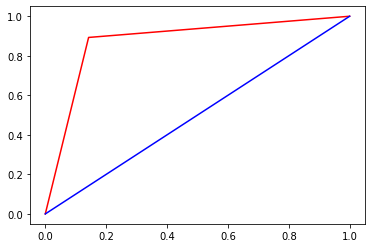

In [553]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [554]:
dt_roc_hp = roc_auc_score(y_test,y_prob)
print(dt_roc_hp)

0.946467822187942


# Random Forest

In [834]:
rfc = RandomForestClassifier()
rfc.fit(x_train_new,y_train_new)
rf_train_score = rfc.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',rf_train_score)

Training Accuracy Score :  0.9981626999830403


In [835]:
y_pred_rf = rfc.predict(x_test)
rf_test_score = accuracy_score(y_test,y_pred_rf)
print('Testing Accuracy Score : ',rf_test_score)

Testing Accuracy Score :  0.8855555555555555


In [836]:
cm = confusion_matrix(y_test,y_pred_rf)
cm

array([[6998,  613],
       [ 417,  972]], dtype=int64)

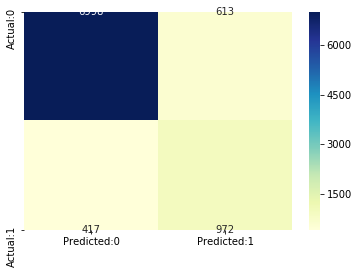

In [837]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [838]:
rf_f1_score = f1_score(y_test,y_pred_rf)
print(rf_f1_score)

0.6536650975117687


In [839]:
rf_recall_score = recall_score(y_test,y_pred_rf)
print(rf_recall_score)

0.6997840172786177


In [840]:
rf_precision_score = precision_score(y_test,y_pred_rf)
print(rf_precision_score)

0.6132492113564669


In [841]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7611
           1       0.61      0.70      0.65      1389

    accuracy                           0.89      9000
   macro avg       0.78      0.81      0.79      9000
weighted avg       0.89      0.89      0.89      9000



In [842]:
y_prob = rf.predict_proba(x_test)[:,1]
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [843]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

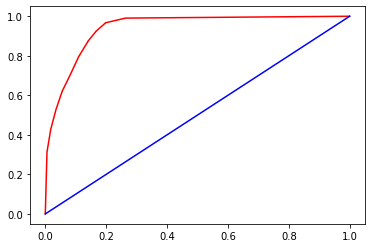

In [844]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [845]:
rf_roc = roc_auc_score(y_test,y_prob)
print(rf_roc)

0.9396853612373209


# Hyper Parameter Tuning

In [846]:
params = {
    'n_estimators' : range(10,100,10),
    'max_depth' : range(2,10,1),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : range(2,10,1),
    'max_features' : ['auto','log2']
}

In [847]:
rs = RandomizedSearchCV(rfc,param_distributions=params,cv=3,n_jobs= -1, scoring='accuracy')
rs.fit(x_train_new,y_train_new)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [848]:
rs.best_params_

{'n_estimators': 90,
 'max_leaf_nodes': 9,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'entropy'}

In [849]:
rfc = RandomForestClassifier(**rs.best_params_)
rfc.fit(x_train_new,y_train_new)
rf_train_hp = rfc.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',rf_train_hp)

Training Accuracy Score :  0.8878964328113517


In [850]:
y_pred_rf = rfc.predict(x_test)
rf_test_hp = accuracy_score(y_test,y_pred_rf)
print('Testing Accuracy Score',rf_test_hp)

Testing Accuracy Score 0.8535555555555555


In [851]:
cm = confusion_matrix(y_test,y_pred_rf)
cm

array([[6407, 1204],
       [ 114, 1275]], dtype=int64)

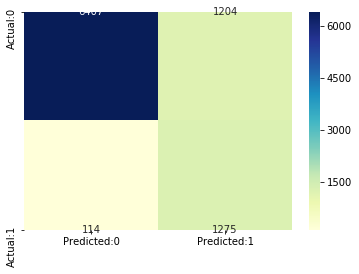

In [852]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [853]:
rf_f1_score_hp = f1_score(y_test,y_pred_rf)
print(rf_f1_score_hp)

0.6592554291623577


In [854]:
rf_recall_score_hp = recall_score(y_test,y_pred_rf)
print(rf_recall_score_hp)

0.91792656587473


In [855]:
rf_precision_score_hp = precision_score(y_test,y_pred_rf)
print(rf_precision_score_hp)

0.5143202904396934


In [856]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      7611
           1       0.51      0.92      0.66      1389

    accuracy                           0.85      9000
   macro avg       0.75      0.88      0.78      9000
weighted avg       0.91      0.85      0.87      9000



In [857]:
y_prob = rf.predict_proba(x_test)[:,1]
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [858]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

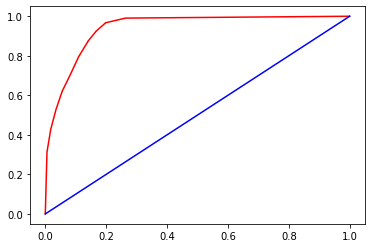

In [859]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [860]:
rf_roc_hp = roc_auc_score(y_test,y_prob)
print(rf_roc_hp)

0.9396853612373209


In [861]:
rf.feature_importances_

array([0.04625433, 0.01151401, 0.01375306, 0.00868016, 0.0282168 ,
       0.29089911, 0.14417754, 0.03021816, 0.08121317, 0.05026747,
       0.04587187, 0.02654152, 0.02002782, 0.02113199, 0.01844551,
       0.01681666, 0.01888089, 0.02360885, 0.02205358, 0.02220186,
       0.01614548, 0.02072509, 0.02235509])

In [862]:
names = df1.drop('default',axis=1)
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names),reverse=True))          

[(0.2909, 'PAY_1'), (0.1442, 'PAY_2'), (0.0812, 'PAY_4'), (0.0503, 'PAY_5'), (0.0463, 'LIMIT_BAL'), (0.0459, 'PAY_6'), (0.0302, 'PAY_3'), (0.0282, 'AGE'), (0.0265, 'BILL_AMT1'), (0.0236, 'PAY_AMT1'), (0.0224, 'PAY_AMT6'), (0.0222, 'PAY_AMT3'), (0.0221, 'PAY_AMT2'), (0.0211, 'BILL_AMT3'), (0.0207, 'PAY_AMT5'), (0.02, 'BILL_AMT2'), (0.0189, 'BILL_AMT6'), (0.0184, 'BILL_AMT4'), (0.0168, 'BILL_AMT5'), (0.0161, 'PAY_AMT4'), (0.0138, 'EDUCATION'), (0.0115, 'SEX'), (0.0087, 'MARRIAGE')]


# Naive Bias

In [582]:
nb = GaussianNB()
nb.fit(x_train_new,y_train_new)
nb_train_score = nb.score(x_train_new,y_train_new)
print('Trainining Accuracy Score : ',nb_train_score)

Trainining Accuracy Score :  0.8725761772853186


In [583]:
y_pred_nb = nb.predict(x_test)
nb_test_score = accuracy_score(y_test,y_pred_nb)
print('Testing Accuracy Score : ',nb_test_score)

Testing Accuracy Score :  0.8511111111111112


In [584]:
cm = confusion_matrix(y_test,y_pred_nb)
cm

array([[6442, 1169],
       [ 171, 1218]], dtype=int64)

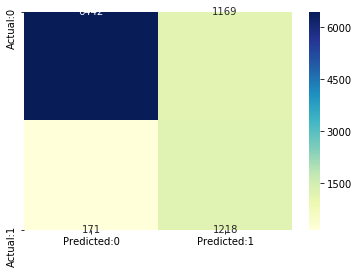

In [585]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [586]:
nb_f1_score = f1_score(y_test,y_pred_nb)
print(nb_f1_score)

0.6451271186440678


In [587]:
nb_precision_score = precision_score(y_test,y_pred_nb)
print(nb_precision_score)

0.5102639296187683


In [588]:
nb_recall_score = recall_score(y_test,y_pred_nb)
print(nb_recall_score)

0.8768898488120951


In [589]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7611
           1       0.51      0.88      0.65      1389

    accuracy                           0.85      9000
   macro avg       0.74      0.86      0.78      9000
weighted avg       0.90      0.85      0.87      9000



In [590]:
y_prob = nb.predict_proba(x_test)[:,1]
y_prob

array([0.12512967, 0.03669955, 0.09917403, ..., 0.10975412, 0.0165374 ,
       0.01200115])

In [591]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

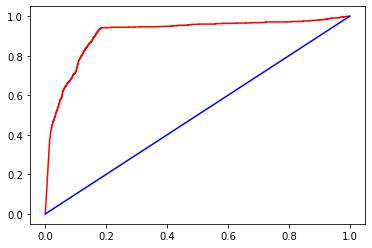

In [592]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [593]:
nb_roc = roc_auc_score(y_test,y_prob)
print(nb_roc)

0.9108257543574677


In [594]:
model = {
    'Train Accuracy' : [log_reg_train_score,knn_train_score,dt_train_score,rf_train_score,nb_train_score],
    'Test Accuracy' : [log_reg_test_score,knn_test_score,dt_test_score,rf_test_score,nb_test_score],
    'F1 Score' : [log_reg_f1_score,knn_f1_score,dt_f1_score,rf_f1_score,nb_f1_score],
    'Recall Score' : [log_reg_recall_score,knn_recall_score,dt_recall_score,rf_recall_score,nb_recall_score],
    'Precision Score' : [log_reg_precision_score,knn_precision_score,dt_precision_score,rf_precision_score,nb_precision_score],
    'Roc Auc Score' : [log_reg_roc,knn_roc,dt_roc,rf_roc,nb_roc]
}

In [595]:
result_base_models = pd.DataFrame(model,index=['Logistic Regression Model','K Nearest Neighbor Model','Decision Tree Model',
                                               'Random Forest Model','Naive Bias']) 
result_base_models

,Train Accuracy,Test Accuracy,F1 Score,Recall Score,Precision Score,Roc Auc Score
Logistic Regression Model,0.870993,0.878889,0.681659,0.840173,0.573464,0.949730
K Nearest Neighbor Model,0.943779,0.862000,0.654808,0.848092,0.533273,0.915355
Decision Tree Model,0.999774,0.877667,0.632387,0.681785,0.589664,0.798174
Random Forest Model,0.998078,0.887333,0.663123,0.718503,0.615669,0.937818
Naive Bias,0.872576,0.851111,0.645127,0.876890,0.510264,0.910826


- From the base models we observe that Logiostic Regression is giving the best accuracy considering all the metrics.

In [598]:
model = {
    'Train Accuracy' : [log_reg_train_score,knn_train_score,dt_train_score,rf_train_score,nb_train_score,log_reg_train_hp,dt_train_hp,rf_train_hp],
    'Test Accuracy' : [log_reg_test_score,knn_test_score,dt_test_score,rf_test_score,nb_test_score,log_reg_test_hp,dt_test_hp,rf_test_hp],
    'F1 Score' : [log_reg_f1_score,knn_f1_score,dt_f1_score,rf_f1_score,nb_f1_score,log_reg_f1_score_hp,dt_f1_score_hp,rf_f1_score_hp],
    'Recall Score' : [log_reg_recall_score,knn_recall_score,dt_recall_score,rf_recall_score,nb_recall_score,log_reg_recall_score_hp,dt_recall_score_hp,rf_recall_score_hp],
    'Precision Score' : [log_reg_precision_score,knn_precision_score,dt_precision_score,rf_precision_score,nb_precision_score,log_reg_precision_score_hp,dt_precision_score_hp,rf_precision_score_hp],
    'Roc Auc Score' : [log_reg_roc,knn_roc,dt_roc,rf_roc,nb_roc,log_reg_roc_hp,dt_roc_hp,rf_roc_hp]
}

In [599]:
result_all_models = pd.DataFrame(model,index=['Logistic Regression Model','K Nearest Neighbor Model','Decision Tree Model',
                                               'Random Forest Model','Naive Bias Model','Logistic Regression with Hyper Parameter Tuning',
                                               'Decision Tree with Hyper Parameter Tuning','Random Forest with Hyper Parameter Tuning']) 
result_all_models

,Train Accuracy,Test Accuracy,F1 Score,Recall Score,Precision Score,Roc Auc Score
Logistic Regression Model,0.870993,0.878889,0.681659,0.840173,0.573464,0.949730
K Nearest Neighbor Model,0.943779,0.862000,0.654808,0.848092,0.533273,0.915355
Decision Tree Model,0.999774,0.877667,0.632387,0.681785,0.589664,0.798174
Random Forest Model,0.998078,0.887333,0.663123,0.718503,0.615669,0.937818
Naive Bias Model,0.872576,0.851111,0.645127,0.876890,0.510264,0.910826
Logistic Regression with Hyper Parameter Tuning,0.871135,0.878889,0.681659,0.840173,0.573464,0.910826
Decision Tree with Hyper Parameter Tuning,0.922098,0.863111,0.668103,0.892729,0.533793,0.946468
Random Forest with Hyper Parameter Tuning,0.883741,0.856444,0.662487,0.912887,0.519885,0.947911


- From all the above models we observe that Random Forest Classifier is giving the best accuracy considering all the metrics. Hence, we proceed forward for feature selection with the random forest model.

# Feature Selection using RFE

### RFE on Decision Tree Model

In [600]:
for i in range(1,df1.shape[1]):
   
    model = RFE(DecisionTreeClassifier(),i).fit(x,y)
    print(x.columns[model.support_])
    x_train,x_test,y_train,y_test = train_test_split(model.transform(x),y,test_size=0.3,random_state=0)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    dt_recall = recall_score(y_test,y_pred)
    print(dt_recall)

Index(['BILL_AMT2'], dtype='object')
0.1628242074927954
Index(['PAY_1', 'BILL_AMT1'], dtype='object')
0.5021613832853026
Index(['PAY_1', 'BILL_AMT2', 'BILL_AMT5'], dtype='object')
0.5100864553314121
Index(['PAY_1', 'BILL_AMT1', 'BILL_AMT4', 'BILL_AMT6'], dtype='object')
0.5540345821325648
Index(['PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4', 'BILL_AMT6'], dtype='object')
0.5468299711815562
Index(['AGE', 'PAY_1', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT6'], dtype='object')
0.5785302593659942
Index(['AGE', 'PAY_1', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4',
       'BILL_AMT6'],
      dtype='object')
0.5778097982708934
Index(['AGE', 'PAY_1', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT6',
       'PAY_AMT2', 'PAY_AMT3'],
      dtype='object')
0.5821325648414986
Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT4', 'BILL_AMT6', 'PAY_AMT6'],
      dtype='object')
0.5886167146974063
Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_6', 'BILL_AMT1', 'BILL_

In [601]:
def rf_model(dset):
    model = DecisionTreeClassifier().fit(dset[0],dset[2])
    return model.score(dset[1],dset[3])


def rfe_xy(x,y,count,opt=True):
    dset = train_test_split(x,y,test_size=.3 , random_state=0)
    rfm = RFE(DecisionTreeClassifier() , count)
    dset[0] = rfm.fit_transform(dset[0],dset[2])
    dset[1] = rfm.transform(dset[1])
   
    if opt == True :
        return lr_model(dset)
    else :
        return rfm

def rfe_main(x,y):
   
    sc = []
    for i in range(25):
        sc.append(rfe_xy(x,y,i))
       
   
    return {
        'Feture' : x.columns[rfe_xy(x,y,np.argmax(np.array(sc)) + 1,opt=False).support_].values ,
        'Recc Count' : np.argmax(np.array(sc)) + 1 ,
        'Scr_List' : np.array(sc)
    }

In [602]:
cols = list(x.columns)
model = DecisionTreeClassifier()
#initializing RFE model
rfe = RFE(model,13)
x_rfe = rfe.fit_transform(x,y)
model.fit(x_rfe,y)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_3', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT4', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT6'],
      dtype='object')


In [603]:
X = df1[selected_features_rfe]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
rf = DecisionTreeClassifier()
model = rf.fit(x_train,y_train)

print("train accuracy",model.score(x_train,y_train))
print("test accuracy",model.score(x_test,y_test))

train accuracy 0.9985714285714286
test accuracy 0.8726666666666667


In [604]:
params = {
    'max_depth' : np.arange(3,10),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : [5,10,20,100],
    'min_samples_split' : [2,5,10,20]
}

In [606]:
gs = GridSearchCV(dt,params,cv=3,scoring='accuracy')
gs.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
         

In [607]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 10,
 'min_samples_split': 2}

In [608]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(x_train,y_train)
dt_train_rfe = dt.score(x_train,y_train)
print('Training Accuracy Score : ',dt_train_rfe)

Training Accuracy Score :  0.9124285714285715


In [609]:
y_pred_dt = dt.predict(x_test)
dt_test_rfe = accuracy_score(y_test,y_pred_dt)
print('Testing Accuracy Score : ',dt_test_rfe)

Testing Accuracy Score :  0.9125555555555556


In [610]:
cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[7413,  198],
       [ 589,  800]], dtype=int64)

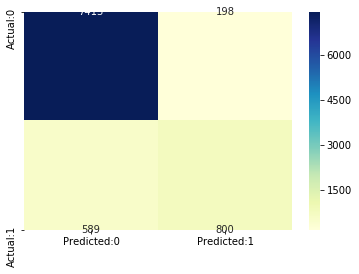

In [611]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [612]:
dt_f1_score_rfe = f1_score(y_test,y_pred_dt)
print(dt_f1_score_rfe)

0.6702974444909929


In [613]:
dt_precision_score_rfe = precision_score(y_test,y_pred_dt)
print(dt_precision_score_rfe)

0.8016032064128257


In [614]:
dt_recall_score_rfe = recall_score(y_test,y_pred_dt)
print(dt_recall_score_rfe)

0.5759539236861051


In [615]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7611
           1       0.80      0.58      0.67      1389

    accuracy                           0.91      9000
   macro avg       0.86      0.77      0.81      9000
weighted avg       0.91      0.91      0.91      9000



In [616]:
y_prob = dt.predict_proba(x_test)[:,1]
y_prob

array([0.01241135, 0.01241135, 0.01241135, ..., 0.01241135, 0.01241135,
       0.01241135])

In [617]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_dt)

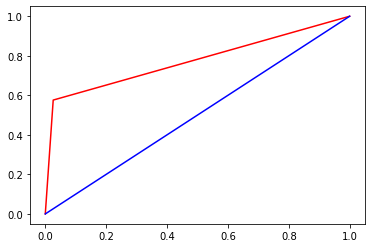

In [618]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [619]:
dt_roc_rfe = roc_auc_score(y_test,y_prob)
print(dt_roc_rfe)

0.9319749965923104


###  RFE on Random Forest Model

In [620]:
for i in range(1,df1.shape[1]):
   
    model = RFE(RandomForestClassifier(),i).fit(x,y)
    print(x.columns[model.support_])
    x_train,x_test,y_train,y_test = train_test_split(model.transform(x),y,test_size=0.3,random_state=0)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    rf_recall = recall_score(y_test,y_pred)
    print(rf_recall)

Index(['BILL_AMT2'], dtype='object')
0.14553314121037464
Index(['PAY_1', 'BILL_AMT2'], dtype='object')
0.48487031700288186
Index(['PAY_1', 'BILL_AMT2', 'BILL_AMT4'], dtype='object')
0.5129682997118156
Index(['PAY_1', 'BILL_AMT2', 'BILL_AMT5', 'BILL_AMT6'], dtype='object')
0.5331412103746398
Index(['PAY_1', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT6'], dtype='object')
0.5547550432276657
Index(['PAY_1', 'PAY_2', 'BILL_AMT1', 'BILL_AMT3', 'BILL_AMT5', 'BILL_AMT6'], dtype='object')
0.5367435158501441
Index(['PAY_1', 'PAY_4', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6'],
      dtype='object')
0.5540345821325648
Index(['PAY_1', 'PAY_3', 'PAY_5', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT5', 'BILL_AMT6'],
      dtype='object')
0.5518731988472623
Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_4', 'BILL_AMT1', 'BILL_AMT3',
       'BILL_AMT5', 'BILL_AMT6'],
      dtype='object')
0.579250720461095
Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 

In [622]:
#x = df1.drop('default',axis=1)
#y = df1['default']
#no.of features through Recursive Feature Elimination
nof_list = np.arange(1,25)
high_score = 0
high_recall = 0
#variable to store optimum no.of features
nof = 0
score_list = []
recall = []
for n in range(len(nof_list)):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
    model = DecisionTreeClassifier()
    rfe = RFE(model,nof_list[n])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    #if(score>high_score):
        #high_score = score
        #nof = nof_list[n]
    y_pred = model.predict(x_test_rfe)
    recall_scores = recall_score(y_test,y_pred)
    recall.append(recall_scores)
    if(recall_scores>high_recall):
        high_recall = recall_scores
        nof = nof_list[n]
print('optimum no.of features : %d' %nof )
print('score with %d features: %f', (nof,recall_scores))

optimum no.of features : 19
score with %d features: %f (19, 0.6263498920086393)


In [623]:
cols = list(x.columns)
model =RandomForestClassifier()
#initializing RFE model
rfe = RFE(model,23)
x_rfe = rfe.fit_transform(x,y)
model.fit(x_rfe,y)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [624]:
X = df1[selected_features_rfe]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
rf = RandomForestClassifier()
model = rf.fit(x_train,y_train)

print("train accuracy",model.score(x_train,y_train))
print("test accuracy",model.score(x_test,y_test))

train accuracy 0.9938571428571429
test accuracy 0.8998888888888888


In [625]:
params = {
    'n_estimators' : range(10,100,10),
    'max_depth' : range(2,10,1),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : range(2,10,1),
    'max_features' : ['auto','log2']
}

In [626]:
rs = RandomizedSearchCV(rf,param_distributions=params,cv=3,n_jobs= -1, scoring='accuracy')
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [627]:
rs.best_params_

{'n_estimators': 30,
 'max_leaf_nodes': 9,
 'max_features': 'auto',
 'max_depth': 4,
 'criterion': 'entropy'}

In [628]:
rf = RandomForestClassifier(**rs.best_params_)
rf.fit(x_train,y_train)
rf_train_rfe = rf.score(x_train,y_train)
print('Training Accuracy Score : ',rf_train_rfe)

Training Accuracy Score :  0.899


In [629]:
y_pred_rf = rf.predict(x_test)
rf_test_rfe = accuracy_score(y_test,y_pred_rf)
print('Testing Accuracy Score',rf_test_rfe)

Testing Accuracy Score 0.8944444444444445


In [630]:
cm = confusion_matrix(y_test,y_pred_rf)
cm

array([[7407,  204],
       [ 746,  643]], dtype=int64)

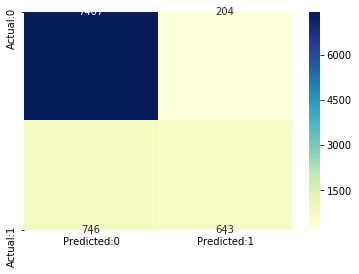

In [631]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [632]:
rf_f1_score_rfe = f1_score(y_test,y_pred_rf)
print(rf_f1_score_rfe)

0.575134168157424


In [633]:
rf_precision_score_rfe = precision_score(y_test,y_pred_rf)
print(rf_precision_score_rfe)

0.7591499409681228


In [634]:
rf_recall_score_rfe = recall_score(y_test,y_pred_rf)
print(rf_recall_score_rfe)

0.462922966162707


In [635]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7611
           1       0.76      0.46      0.58      1389

    accuracy                           0.89      9000
   macro avg       0.83      0.72      0.76      9000
weighted avg       0.89      0.89      0.88      9000



In [636]:
rf_roc_rfe = roc_auc_score(y_test,y_pred_rf)
print(rf_roc_rfe)

0.7180598275827331


# Ensembling Techniques 

### Bagging 

In [807]:
model_bagg = BaggingClassifier(base_estimator=dt)

In [808]:
model_bagg.fit(x_train_new,y_train_new)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=10,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
         

In [809]:
bagg_train_score = model_bagg.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',bagg_train_score)
y_pred_bagg = model_bagg.predict(x_test)
bagg_test_score = model_bagg.score(x_test,y_test)
print('Testing Accuracy Score : ',bagg_test_score)

Training Accuracy Score :  0.892729945163661
Testing Accuracy Score :  0.8322222222222222


In [810]:
cross_val_score(model_bagg,x,y,cv=10).mean()

0.9117000000000001

In [811]:
y_pred_bagg = model_bagg.predict(x_test)

In [812]:
cm = confusion_matrix(y_test,y_pred_bagg)
cm

array([[6156, 1455],
       [  55, 1334]], dtype=int64)

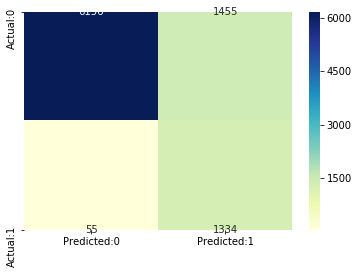

In [813]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [814]:
dt_f1_score_bagg = f1_score(y_test,y_pred_bagg)
print(dt_f1_score_bagg)

0.6385830540928673


In [815]:
dt_precision_score_bagg = precision_score(y_test,y_pred_bagg)
print(dt_precision_score_bagg)

0.47830763714593044


In [816]:
dt_recall_score_bagg = recall_score(y_test,y_pred_bagg)
print(dt_recall_score_bagg)

0.9604031677465803


In [817]:
print(classification_report(y_test,y_pred_bagg))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      7611
           1       0.48      0.96      0.64      1389

    accuracy                           0.83      9000
   macro avg       0.73      0.88      0.76      9000
weighted avg       0.91      0.83      0.85      9000



In [818]:
dt_roc_bagg = roc_auc_score(y_test,y_pred_bagg)
print(dt_roc_bagg)

0.884616246861071


- Bagging of Decision Tree gives us a lower accuracy score and recall score is also low. Hence, we proceed with boosting the decision tree and random forest models.

### Boosting

- AdaBoosting on Decision Tree Model

In [821]:
model_ada = AdaBoostClassifier(base_estimator=dt)
model_ada.fit(x_train_new,y_train_new)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=10,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [822]:
dt_ada_train_score =model_ada.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',dt_ada_train_score)
y_pred_ada = model_ada.predict(x_test)
dt_ada_test_score = model_ada.score(x_test,y_test)
print('Testing Accuracy Score : ',dt_ada_test_score)

Training Accuracy Score :  0.9494318503024478
Testing Accuracy Score :  0.8862222222222222


In [823]:
cross_val_score(model_ada,x,y,cv=10).mean()

0.8999333333333333

In [824]:
y_pred_ada = model_ada.predict(x_test)

In [825]:
cm = confusion_matrix(y_test,y_pred_ada)
cm

array([[7032,  579],
       [ 445,  944]], dtype=int64)

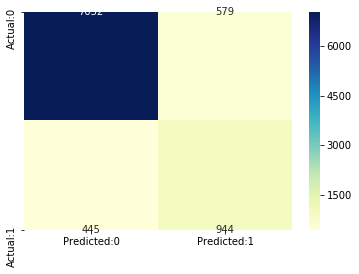

In [826]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [827]:
dt_f1_score_ada = f1_score(y_test,y_pred_ada)
print(dt_f1_score_ada)

0.6483516483516484


In [828]:
dt_precision_score_ada = precision_score(y_test,y_pred_ada)
print(dt_precision_score_ada)

0.6198292843072882


In [829]:
dt_recall_score_ada = recall_score(y_test,y_pred_ada)
print(dt_recall_score_ada)

0.6796256299496041


In [830]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7611
           1       0.62      0.68      0.65      1389

    accuracy                           0.89      9000
   macro avg       0.78      0.80      0.79      9000
weighted avg       0.89      0.89      0.89      9000



In [831]:
dt_roc_ada = roc_auc_score(y_test,y_pred_ada)
print(dt_roc_ada)

0.8017757633390118


- Adaboosting on Random Forest Model

In [863]:
model_ada = AdaBoostClassifier(base_estimator=rfc)
model_ada.fit(x_train_new,y_train_new)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=7,
                                                         max_features='log2',
                                                         max_leaf_nodes=9,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=90,
                            

In [864]:
rf_ada_train_score =model_ada.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',rf_ada_train_score)
y_pred_ada = model_ada.predict(x_test)
rf_ada_test_score = model_ada.score(x_test,y_test)
print('Testing Accuracy Score : ',rf_ada_test_score)

Training Accuracy Score :  0.9490361241449489
Testing Accuracy Score :  0.89


In [866]:
cross_val_score(model_ada,x,y,cv=10).mean()

In [867]:
y_pred_ada = model_ada.predict(x_test)

In [868]:
cm = confusion_matrix(y_test,y_pred_ada)
cm

array([[6953,  658],
       [ 332, 1057]], dtype=int64)

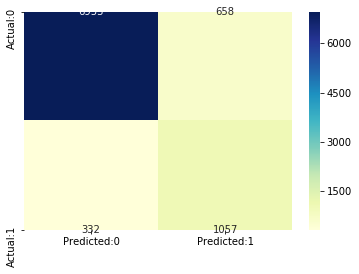

In [869]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [870]:
rf_f1_score_ada = f1_score(y_test,y_pred_ada)
print(rf_f1_score_ada)

0.6810567010309277


In [871]:
rf_precision_score_ada = precision_score(y_test,y_pred_ada)
print(rf_precision_score_ada)

0.6163265306122448


In [872]:
rf_recall_score_ada = recall_score(y_test,y_pred_ada)
print(rf_recall_score_ada)

0.7609791216702664


In [873]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7611
           1       0.62      0.76      0.68      1389

    accuracy                           0.89      9000
   macro avg       0.79      0.84      0.81      9000
weighted avg       0.90      0.89      0.89      9000



In [874]:
rf_roc_ada = roc_auc_score(y_test,y_pred_ada)
print(rf_roc_ada)

0.8372626524131125


- Upon adaboosting we observe that random forest model gives us a good accuracy score along with good recall score too. Hence, we try for gradient boosting just to make sure if the accuracy can be uplifted.

- Gradient Boosting

In [882]:
model_grad = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model_grad.fit(x_train_new,y_train_new)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [883]:
grad_train_score = model_grad.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',grad_train_score)
y_pred_grad = model_grad.predict(x_test)
grad_test_score = model_grad.score(x_test,y_test)
print('Testing Accuracy Score : ',grad_test_score)

Training Accuracy Score :  0.8819888066029736
Testing Accuracy Score :  0.8576666666666667


In [1435]:
cross_val_score(model_grad,x,y,cv=10).mean()

0.9221330835999721

In [884]:
y_pred_grad = model_grad.predict(x_test)

In [885]:
cm = confusion_matrix(y_test,y_pred_grad)
cm

array([[6481, 1130],
       [ 151, 1238]], dtype=int64)

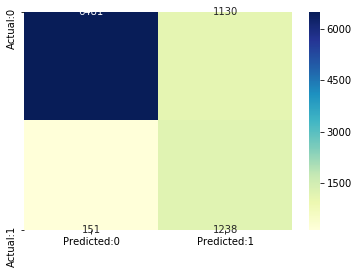

In [886]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [887]:
grad_f1_score = f1_score(y_test,y_pred_grad)
print(grad_f1_score)

0.6590364652648389


In [888]:
grad_precision_score = precision_score(y_test,y_pred_grad)
print(grad_precision_score)

0.5228040540540541


In [889]:
grad_recall_score = recall_score(y_test,y_pred_grad)
print(grad_recall_score)

0.8912886969042476


In [890]:
print(classification_report(y_test,y_pred_grad))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7611
           1       0.52      0.89      0.66      1389

    accuracy                           0.86      9000
   macro avg       0.75      0.87      0.78      9000
weighted avg       0.91      0.86      0.87      9000



In [891]:
grad_roc = roc_auc_score(y_test,y_pred_grad)
print(grad_roc)

0.8714096880921185


# Hyper Parameter Tuning

In [892]:
params = {
    'learning_rate' : [1,0.5,0.25,0.1,0.05,0.01],
    'n_estimators' : range(10,100,10),
    'max_depth' : range(1,30,1),
    'min_samples_split' : np.linspace(0.1,1.0,10,endpoint=True),
    'min_samples_leaf' : np.linspace(0.1,0.5,5,endpoint=True),
    'max_features' : list(range(1,x_train_new.shape[1]))
}

In [895]:
gs = RandomizedSearchCV(model_grad,params,cv=3,n_jobs= -1, scoring='accuracy')
gs.fit(x_train_new,y_train_new)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.01,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [896]:
gs.best_params_

{'n_estimators': 60,
 'min_samples_split': 0.8,
 'min_samples_leaf': 0.30000000000000004,
 'max_features': 5,
 'max_depth': 21,
 'learning_rate': 0.5}

In [897]:
model_grad = GradientBoostingClassifier(**gs.best_params_)
model_grad.fit(x_train_new,y_train_new)
grad_train_hp = model_grad.score(x_train_new,y_train_new)
print('Training Accuracy Score : ',grad_train_hp)

Training Accuracy Score :  0.8819322742947594


In [898]:
y_pred_grad = model_grad.predict(x_test)
grad_test_hp = accuracy_score(y_test,y_pred_grad)
print('Testing Accuracy Score',grad_test_hp)

Testing Accuracy Score 0.8676666666666667


In [899]:
cm = confusion_matrix(y_test,y_pred_grad)
cm

array([[6635,  976],
       [ 215, 1174]], dtype=int64)

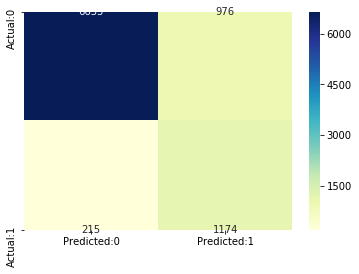

In [900]:
cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm,annot=True,fmt ='d',cmap='YlGnBu')

In [901]:
grad_f1_score_hp = f1_score(y_test,y_pred_grad)
print(grad_f1_score_hp)

0.6634642554393897


In [902]:
grad_recall_score_hp = recall_score(y_test,y_pred_grad)
print(grad_recall_score_hp)

0.8452123830093593


In [903]:
grad_precision_score_hp = precision_score(y_test,y_pred_grad)
print(grad_precision_score_hp)

0.546046511627907


In [904]:
print(classification_report(y_test,y_pred_grad))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7611
           1       0.55      0.85      0.66      1389

    accuracy                           0.87      9000
   macro avg       0.76      0.86      0.79      9000
weighted avg       0.90      0.87      0.88      9000



In [905]:
y_prob = model_grad.predict_proba(x_test)[:,1]
y_prob

array([0.11618886, 0.08055724, 0.12119983, ..., 0.14831422, 0.06247737,
       0.04309143])

In [906]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)

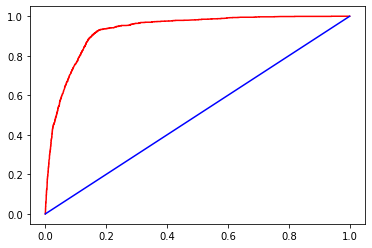

In [907]:
plt.plot(fpr,tpr,color='r')
plt.plot(fpr,fpr,color='b')

In [908]:
grad_roc_hp = roc_auc_score(y_test,y_prob)
print(grad_roc_hp)

0.9286051439889539


# KFold Cross Validation

In [909]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(x) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=10, random_state=None, shuffle=False)

In [910]:
scores = cross_val_score(dt, x_train_new , y_train_new, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.11)


In [911]:
scores = cross_val_score(rfc, x_train_new , y_train_new, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.05)


In [912]:
model = {
    'Train Accuracy' : [log_reg_train_score,knn_train_score,dt_train_score,rf_train_score,nb_train_score,log_reg_train_hp,dt_train_hp,rf_train_hp,dt_train_rfe,rf_train_rfe,bagg_train_score,dt_ada_train_score,rf_ada_train_score,grad_train_score,grad_train_hp],
    'Test Accuracy' : [log_reg_test_score,knn_test_score,dt_test_score,rf_test_score,nb_test_score,log_reg_test_hp,dt_test_hp,rf_test_hp,dt_test_rfe,rf_test_rfe,bagg_test_score,dt_ada_test_score,rf_ada_test_score,grad_test_score,grad_test_hp],
    'F1 Score' : [log_reg_f1_score,knn_f1_score,dt_f1_score,rf_f1_score,nb_f1_score,log_reg_f1_score_hp,dt_f1_score_hp,rf_f1_score_hp,dt_f1_score_rfe,rf_f1_score_rfe,dt_f1_score_bagg,dt_f1_score_ada,rf_f1_score_ada,grad_f1_score,grad_f1_score_hp],
    'Recall Score' : [log_reg_recall_score,knn_recall_score,dt_recall_score,rf_recall_score,nb_recall_score,log_reg_recall_score_hp,dt_recall_score_hp,rf_recall_score_hp,dt_recall_score_rfe,rf_recall_score_rfe,dt_recall_score_bagg,dt_recall_score_ada,rf_recall_score_ada,grad_recall_score,grad_recall_score_hp],
    'Precision Score' : [log_reg_precision_score,knn_precision_score,dt_precision_score,rf_precision_score,nb_precision_score,log_reg_precision_score_hp,dt_precision_score_hp,rf_precision_score_hp,dt_precision_score_rfe,rf_precision_score_rfe,dt_precision_score_bagg,dt_precision_score_ada,rf_precision_score_ada,grad_precision_score,grad_precision_score_hp],
    'Roc Auc Score' : [log_reg_roc,knn_roc,dt_roc,rf_roc,nb_roc,log_reg_roc_hp,dt_roc_hp,rf_roc_hp,dt_roc_rfe,rf_roc_rfe,dt_roc_bagg,dt_roc_ada,rf_roc_ada,grad_roc,grad_roc_hp]
}

In [913]:
result_all_models = pd.DataFrame(model,index=['Logistic Regression Model','K Nearest Neighbor Model','Decision Tree Model',
                                               'Random Forest Model','Naive Bias Model','Logistic Regression with Hyper Parameter Tuning',
                                               'Decision Tree with Hyper Parameter Tuning','Random Forest with Hyper Parameter Tuning',
                                              'Decision Tree with RFE','Random Forest with RFE','Decision Tree with Bagging','Decision Tree with Adaboosting',
                                             'Random Forest with Adaboosting','Model with Gradient Boosting','Hyper parameterized Model with Gradient Boosting'])
result_all_models

,Train Accuracy,Test Accuracy,F1 Score,Recall Score,Precision Score,Roc Auc Score
Logistic Regression Model,0.870993,0.878889,0.681659,0.840173,0.573464,0.949730
K Nearest Neighbor Model,0.943779,0.862000,0.654808,0.848092,0.533273,0.915355
Decision Tree Model,0.999774,0.877667,0.632387,0.681785,0.589664,0.798174
Random Forest Model,0.998163,0.885556,0.653665,0.699784,0.613249,0.939685
Naive Bias Model,0.872576,0.851111,0.645127,0.876890,0.510264,0.910826
Logistic Regression with Hyper Parameter Tuning,0.871135,0.878889,0.681659,0.840173,0.573464,0.910826
Decision Tree with Hyper Parameter Tuning,0.922098,0.863111,0.668103,0.892729,0.533793,0.946468
Random Forest with Hyper Parameter Tuning,0.887896,0.853556,0.659255,0.917927,0.514320,0.939685
Decision Tree with RFE,0.912429,0.912556,0.670297,0.575954,0.801603,0.931975
Random Forest with RFE,0.899000,0.894444,0.575134,0.462923,0.759150,0.718060


- Hence, Random Forest Classifier with Hyper Parameter tuning gives the best test accuracy of 85.64% with an excellent recall score of 91.28% and a precision score of 51.98% while the f1 score is 66.24% and the roc_auc score is 94.79%